# An√°lise de Rotatividade de Funcion√°rios - IBM

Este notebook tem como objetivo analisar e modelar a rotatividade de funcion√°rios da IBM com t√©cnicas de regress√£o log√≠stica bin√°ria. O foco principal est√° em identificar os principais fatores associados √† sa√≠da de colaboradores da empresa, com o suporte de visualiza√ß√µes e testes estat√≠sticos robustos.

---

## 1. Importa√ß√£o das Bibliotecas

Nesta etapa, importamos as bibliotecas essenciais para a an√°lise de dados, visualiza√ß√£o e modelagem estat√≠stica. Abaixo est√° um resumo do prop√≥sito de cada uma:

- `pandas`: manipula√ß√£o de dados em DataFrames.
- `funcoes_regressao_binaria`: m√≥dulo personalizado contendo fun√ß√µes auxiliares para regress√£o bin√°ria (criado previamente).
- `matplotlib.pyplot` e `seaborn`: cria√ß√£o de gr√°ficos e visualiza√ß√µes.
- `numpy`: opera√ß√µes matem√°ticas e manipula√ß√£o de arrays.
- `statsmodels.api` e `statsmodels.formula.api`: modelagem estat√≠stica, especialmente regress√£o log√≠stica.
- `math.exp`: fun√ß√£o exponencial, √∫til para converter log-odds em probabilidades.
- `statstests.process.stepwise`: procedimento stepwise automatizado para sele√ß√£o de vari√°veis explicativas.

In [135]:
import pandas as pd
import funcoes_regressao_binaria as frb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm #biblioteca de modelagem estat√≠stica
from math import exp #opera√ß√£o matem√°tica exponencial
from statstests.process import stepwise #procedimento Stepwise
import statsmodels.formula.api as smf #estima√ß√£o do modelo log√≠stico bin√°rio

Com essas ferramentas, estaremos preparados para conduzir uma an√°lise explorat√≥ria aprofundada e construir modelos preditivos estatisticamente s√≥lidos.

## 2. Carregamento dos Dados

Nesta etapa, carregamos os conjuntos de dados que ser√£o utilizados na an√°lise:

- `hr.csv`: cont√©m informa√ß√µes sobre os funcion√°rios da IBM, incluindo vari√°veis demogr√°ficas, profissionais e a vari√°vel alvo `Attrition`, que indica se o funcion√°rio deixou a empresa (`Yes`) ou permaneceu (`No`).
- `years.csv`: cont√©m informa√ß√µes complementares relacionadas ao tempo de servi√ßo.

Os dados foram carregados utilizando a fun√ß√£o `read_csv()` da biblioteca `pandas`, resultando em dois DataFrames:

In [ ]:
dados_hr = pd.read_csv('hr.csv')
dados_years = pd.read_csv('years.csv')

## 3. Estrutura do Conjunto de Dados

Ap√≥s o carregamento, verificamos a dimens√£o do conjunto de dados principal (`dados_hr`), bem como suas informa√ß√µes e se h√° vari√°veis nulas e registros duplicados:

In [137]:
dados_hr.shape

(1470, 22)

In [138]:
dados_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   employee_number            1470 non-null   int64 
 1   age                        1470 non-null   int64 
 2   attrition                  1470 non-null   object
 3   business_travel            1470 non-null   object
 4   department                 1470 non-null   object
 5   distance_from_home         1470 non-null   int64 
 6   education                  1470 non-null   object
 7   education_field            1470 non-null   object
 8   environment_satisfaction   1470 non-null   object
 9   gender                     1470 non-null   object
 10  job_involvement            1470 non-null   object
 11  job_role                   1470 non-null   object
 12  job_satisfaction           1470 non-null   object
 13  marital_status             1470 non-null   object
 14  monthly_

In [139]:
dados_hr['employee_number'].duplicated().sum()

0

In [140]:
dados_hr.isna().sum()

employee_number              0
age                          0
attrition                    0
business_travel              0
department                   0
distance_from_home           0
education                    0
education_field              0
environment_satisfaction     0
gender                       0
job_involvement              0
job_role                     0
job_satisfaction             0
marital_status               0
monthly_income               0
num_companies_worked         0
over_time                    0
percent_salary_hike          0
performance_rating           0
relationship_satisfaction    0
training_times_last_year     0
work_life_balance            0
dtype: int64

In [141]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dados_hr.head()

employee_number  age attrition    business_travel              department  \
0                1   41       Yes      Travel_Rarely                   Sales   
1                2   49        No  Travel_Frequently  Research & Development   
2                4   37       Yes      Travel_Rarely  Research & Development   
3                5   33        No  Travel_Frequently  Research & Development   
4                7   27        No      Travel_Rarely  Research & Development   

   distance_from_home     education education_field environment_satisfaction  \
0                   1  Some college   Life Sciences                   Medium   
1                   8    No college   Life Sciences                     High   
2                   2  Some college           Other                Very high   
3                   3       Masters   Life Sciences                Very high   
4                   2    No college         Medical                      Low   

   gender job_involvement               job_role job_satisfaction  \
0  Female            High        Sales Executive        Very high   
1    Male          Medium     Research Scientist           Medium   
2    Male          Medium  Laboratory Technician             High   
3  Female            High     Research Scientist             High   
4    Male            High  Laboratory Technician           Medium   

  marital_status  monthly_income  num_companies_worked over_time  \
0         Single            5993                     8       Yes   
1        Married            5130                     1        No   
2         Single            2090                     6       Yes   
3        Married            2909                     1       Yes   
4        Married            3468                     9        No   

   percent_salary_hike performance_rating relationship_satisfaction  \
0                   11          Excellent                       Low   
1                   23        Outstanding                 Very high   
2                   15          Excellent                    Medium   
3                   11          Excellent                      High   
4                   12          Excellent                 Very high   

   training_times_last_year work_life_balance  
0                         0               Bad  
1                         3            Better  
2                         3            Better  
3                         3            Better  
4                         3            Better

## 4. An√°lise Explorat√≥ria: Boxplots

Utilizamos a fun√ß√£o personalizada `frb.boxplots` para gerar boxplots de todas as vari√°veis num√©ricas do conjunto de dados `dados_hr`, com exce√ß√£o da coluna `employee_number`, que representa um identificador √∫nico de cada funcion√°rio e, portanto, **n√£o possui valor anal√≠tico direto para a modelagem**.

In [142]:
frb.boxplots(dados_hr, 'employee_number')

Os boxplots s√£o √∫teis para:

* Identificar **distribui√ß√µes**, **assimetria** e **presen√ßa de outliers**.
* Avaliar a **variabilidade** de cada vari√°vel num√©rica.
* Apoiar decis√µes sobre poss√≠veis **tratamentos de dados extremos**.

> üîé **Nota:** A exclus√£o de identificadores como `employee_number` √© uma boa pr√°tica, pois esses campos n√£o carregam significado estat√≠stico relevante e podem distorcer visualiza√ß√µes ou modelos.

## 5. Detec√ß√£o de Outliers - M√©todo IQR

Nesta etapa, aplicamos a fun√ß√£o `frb.detectar_outliers_iqr` para identificar **valores extremos (outliers)** nas vari√°veis num√©ricas do conjunto de dados, com base no m√©todo do intervalo interquartil (IQR - *Interquartile Range*).

In [143]:
frb.detectar_outliers_iqr(df=dados_hr, excluir_classe='employee_number')

Q1      Q3     AIQ     Min      Max  \
age                         30.0    43.0    13.0    18.0     60.0   
distance_from_home           2.0    14.0    12.0     1.0     29.0   
monthly_income            2911.0  8379.0  5468.0  1009.0  19999.0   
num_companies_worked         1.0     4.0     3.0     0.0      9.0   
percent_salary_hike         12.0    18.0     6.0    11.0     25.0   
training_times_last_year     2.0     3.0     1.0     0.0      6.0   

                          Limite Inferior  Limite Superior  Qtd Outliers  
age                                  10.5             62.5           0.0  
distance_from_home                  -16.0             32.0           0.0  
monthly_income                    -5291.0          16581.0         114.0  
num_companies_worked                 -3.5              8.5          52.0  
percent_salary_hike                   3.0             27.0           0.0  
training_times_last_year              0.5              4.5         238.0

 A fun√ß√£o retorna uma tabela no formato `crosstab`, que apresenta um resumo estat√≠stico para cada vari√°vel num√©rica analisada (excetuando a vari√°vel `employee_number`, que √© um identificador). Abaixo est√° a explica√ß√£o detalhada de cada coluna da tabela:

### Colunas do Resultado

* **Q1 (1¬∫ Quartil)**
  Representa o valor abaixo do qual est√£o 25% dos dados. Indica o limite inferior da distribui√ß√£o t√≠pica.

* **Q3 (3¬∫ Quartil)**
  Representa o valor abaixo do qual est√£o 75% dos dados. Indica o limite superior da distribui√ß√£o t√≠pica.

* **IQR (Intervalo Interquart√≠lico)**
  Calculado como `Q3 - Q1`. Mede a **dispers√£o central** dos dados e √© usado para identificar a faixa em que a maior parte dos dados est√° concentrada.
  F√≥rmula:

  $$
  IQR = Q3 - Q1
  $$

* **Min (Valor M√≠nimo Observado)**
  O menor valor encontrado na vari√°vel.

* **Max (Valor M√°ximo Observado)**
  O maior valor encontrado na vari√°vel.

* **Limite Inferior (Lower Bound)**
  Limite inferior para identifica√ß√£o de outliers. Valores abaixo deste limite s√£o considerados valores at√≠picos.
  F√≥rmula:

  $$
  \text{Limite Inferior} = Q1 - 1.5 \times IQR
  $$

* **Limite Superior (Upper Bound)**
  Limite superior para identifica√ß√£o de outliers. Valores acima deste limite s√£o considerados outliers.
  F√≥rmula:

  $$
  \text{Limite Superior} = Q3 + 1.5 \times IQR
  $$

* **Qtd Outliers (Quantidade de Outliers)**
  Contagem de observa√ß√µes que est√£o **fora dos limites inferior e superior**, ou seja, valores que podem ser considerados extremos e potencialmente distorcem a an√°lise.

> ‚ö†Ô∏è A detec√ß√£o de outliers √© uma etapa crucial para garantir a **robustez dos modelos estat√≠sticos**. Embora nem todo outlier precise ser removido, √© fundamental identific√°-los para avaliar sua origem e impacto.

## 6. Tratamento de Outliers com Mediana

Ap√≥s identificar a presen√ßa de outliers, aplicamos a fun√ß√£o `frb.substituir_outliers_mediana` com o objetivo de suavizar os efeitos desses valores extremos nas vari√°veis num√©ricas. A estrat√©gia adotada foi substituir os outliers pelos **valores medianos** de cada vari√°vel.

In [145]:
dados_hr = frb.substituir_outliers_mediana(df=dados_hr, excluir_classe='employee_number')

Essa t√©cnica √© comumente utilizada por ser **robusta a valores extremos**, preservando a distribui√ß√£o central dos dados sem introduzir distor√ß√µes severas.

### Visualiza√ß√£o p√≥s-tratamento

Ap√≥s a substitui√ß√£o, os boxplots foram gerados novamente para reavaliar a presen√ßa de valores at√≠picos:

In [204]:
frb.boxplots(dados=dados_hr, excluir_classe='employee_number')

Al√©m disso, utilizamos novamente a fun√ß√£o `frb.detectar_outliers_iqr` para quantificar os outliers remanescentes:

In [147]:
frb.detectar_outliers_iqr(df=dados_hr, excluir_classe='employee_number')

Q1      Q3     AIQ     Min      Max  \
age                         30.0    43.0    13.0    18.0     60.0   
distance_from_home           2.0    14.0    12.0     1.0     29.0   
monthly_income            2911.0  6581.0  3670.0  1009.0  16555.0   
num_companies_worked         1.0     4.0     3.0     0.0      8.0   
percent_salary_hike         12.0    18.0     6.0    11.0     25.0   
training_times_last_year     2.0     3.0     1.0     1.0      4.0   

                          Limite Inferior  Limite Superior  Qtd Outliers  
age                                  10.5             62.5           0.0  
distance_from_home                  -16.0             32.0           0.0  
monthly_income                    -2594.0          12086.0          79.0  
num_companies_worked                 -3.5              8.5           0.0  
percent_salary_hike                   3.0             27.0           0.0  
training_times_last_year              0.5              4.5           0.0

In [148]:
dados_hr.head()

employee_number  age attrition    business_travel              department  \
0                1   41       Yes      Travel_Rarely                   Sales   
1                2   49        No  Travel_Frequently  Research & Development   
2                4   37       Yes      Travel_Rarely  Research & Development   
3                5   33        No  Travel_Frequently  Research & Development   
4                7   27        No      Travel_Rarely  Research & Development   

   distance_from_home     education education_field environment_satisfaction  \
0                   1  Some college   Life Sciences                   Medium   
1                   8    No college   Life Sciences                     High   
2                   2  Some college           Other                Very high   
3                   3       Masters   Life Sciences                Very high   
4                   2    No college         Medical                      Low   

   gender job_involvement               job_role job_satisfaction  \
0  Female            High        Sales Executive        Very high   
1    Male          Medium     Research Scientist           Medium   
2    Male          Medium  Laboratory Technician             High   
3  Female            High     Research Scientist             High   
4    Male            High  Laboratory Technician           Medium   

  marital_status  monthly_income  num_companies_worked over_time  \
0         Single            5993                     8       Yes   
1        Married            5130                     1        No   
2         Single            2090                     6       Yes   
3        Married            2909                     1       Yes   
4        Married            3468                     2        No   

   percent_salary_hike performance_rating relationship_satisfaction  \
0                   11          Excellent                       Low   
1                   23        Outstanding                 Very high   
2                   15          Excellent                    Medium   
3                   11          Excellent                      High   
4                   12          Excellent                 Very high   

   training_times_last_year work_life_balance  
0                         3               Bad  
1                         3            Better  
2                         3            Better  
3                         3            Better  
4                         3            Better

### Observa√ß√£o sobre `MonthlyIncome`

A vari√°vel `MonthlyIncome` apresentava **114 outliers** inicialmente. Ap√≥s o tratamento com a mediana, o n√∫mero de outliers caiu para **79**. Apesar da redu√ß√£o, ainda existem valores considerados extremos segundo o crit√©rio do IQR.

No entanto, optamos por **manter os valores remanescentes**, pois:

* Renda mensal tende a ser naturalmente assim√©trica e com cauda longa (muitos ganham pouco, poucos ganham muito).
* Esses valores podem representar **diferen√ßas leg√≠timas de posi√ß√£o ou experi√™ncia** e sua remo√ß√£o poderia comprometer a representatividade dos dados.

> ‚úÖ **Decis√£o Anal√≠tica:** A vari√°vel `MonthlyIncome` ser√° mantida com os 79 outliers remanescentes, pois os valores s√£o considerados plaus√≠veis dentro do contexto organizacional.

Perfeito! Aqui est√° o markdown explicativo para a etapa de **visualiza√ß√£o das distribui√ß√µes das vari√°veis num√©ricas** usando histogramas:

---

````markdown
## 7. Visualiza√ß√£o das Distribui√ß√µes - Histogramas

Nesta etapa, geramos histogramas para analisar a **distribui√ß√£o das vari√°veis num√©ricas** do conjunto de dados. Essa an√°lise √© importante para entender o comportamento dos dados, identificar poss√≠veis assimetrias, concentra√ß√µes e dispers√µes.

Como a coluna `employee_number` √© um identificador e n√£o carrega significado anal√≠tico, ela foi removida da visualiza√ß√£o:

In [149]:
dados_hr.drop(columns='employee_number').hist(figsize=(5,5))
plt.tight_layout()

### Objetivos dessa visualiza√ß√£o:

* Verificar **normalidade** ou assimetria das distribui√ß√µes.
* Observar presen√ßa de **valores concentrados** em determinadas faixas.
* Suportar decis√µes sobre poss√≠veis **transforma√ß√µes** de vari√°veis (como logaritmo, padroniza√ß√£o, etc.).
* Entender o comportamento das vari√°veis antes da modelagem estat√≠stica.

Perfeito! A estrutura do `dados_year` indica que ele est√° em formato **longo (long format)**, onde cada linha representa uma m√©trica temporal (`category`) associada a um funcion√°rio identificado por `employee_number`. Abaixo est√° o markdown explicativo para esta etapa:

---

````markdown
## 8. Estrutura do Conjunto de Dados Temporais (`dados_year`)

Utilizamos o m√©todo `.head()` para visualizar as primeiras linhas do conjunto `dados_year`, que cont√©m informa√ß√µes complementares relacionadas ao tempo de servi√ßo dos funcion√°rios:

In [150]:
dados_years.head()

employee_number                    category  years
0                1         total_working_years      8
1                1            years_at_company      6
2                1       years_in_current_role      4
3                1  years_since_last_promotion      0
4                1     years_with_curr_manager      5

### Interpreta√ß√£o:

* `employee_number`: identificador √∫nico de cada funcion√°rio, usado para **relacionar com o conjunto principal** (`dados_hr`).
* `category`: vari√°vel categ√≥rica que descreve o tipo de m√©trica temporal associada ao funcion√°rio.
* `years`: valor num√©rico que representa o tempo (em anos) correspondente √† categoria.

> üìå O formato do dataset est√° estruturado no estilo **"long format"**, onde cada linha representa uma **observa√ß√£o de tempo por categoria** para cada funcion√°rio. Esse formato pode ser √∫til para an√°lises espec√≠ficas ou visualiza√ß√µes, mas normalmente ser√° necess√°rio **pivotar** esse conjunto para o formato **wide (largura)** antes de combin√°-lo com o dataset principal.

## 9. Transforma√ß√£o do Conjunto `dados_years` para Formato Wide

Para facilitar a integra√ß√£o com o conjunto principal (`dados_hr`), transformamos o dataset `dados_years` que estava no formato longo em um formato largo (*wide format*), onde cada m√©trica temporal vira uma coluna distinta.

Utilizamos o m√©todo `pivot` do pandas:

In [ ]:
dados_years = dados_years.pivot(index="employee_number", columns="category", values="years").reset_index()

In [152]:
dados_years.head()

category  employee_number  total_working_years  years_at_company  \
0                       1                    8                 6   
1                       2                   10                10   
2                       4                    7                 0   
3                       5                    8                 8   
4                       7                    6                 2   

category  years_in_current_role  years_since_last_promotion  \
0                             4                           0   
1                             7                           1   
2                             0                           0   
3                             7                           3   
4                             2                           2   

category  years_with_curr_manager  
0                               5  
1                               7  
2                               0  
3                               0  
4                               2

### Detalhes:

* `index="employee_number"`: cada linha representa um funcion√°rio √∫nico.
* `columns="category"`: as categorias de tempo viram colunas separadas.
* `values="years"`: os valores correspondentes s√£o preenchidos nas c√©lulas.

Ap√≥s essa transforma√ß√£o, o dataframe `dados_years` ter√° uma estrutura com colunas como:

* `total_working_years`
* `years_at_company`
* `years_in_current_role`
* `years_since_last_promotion`
* `years_with_curr_manager`

Isso facilita a jun√ß√£o dos dados com o dataset principal para an√°lises conjuntas.

## 10. Verifica√ß√£o da Estrutura e Qualidade do Dataset `dados_years`

Ap√≥s a transforma√ß√£o para formato wide, verificamos as dimens√µes, os tipos de dados e a exist√™ncia de valores ausentes no dataframe `dados_years`:

In [153]:
print(dados_years.shape)
print(dados_years.info())
print(dados_years.isna().sum())

(1470, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   employee_number             1470 non-null   int64
 1   total_working_years         1470 non-null   int64
 2   years_at_company            1470 non-null   int64
 3   years_in_current_role       1470 non-null   int64
 4   years_since_last_promotion  1470 non-null   int64
 5   years_with_curr_manager     1470 non-null   int64
dtypes: int64(6)
memory usage: 69.0 KB
None
category
employee_number               0
total_working_years           0
years_at_company              0
years_in_current_role         0
years_since_last_promotion    0
years_with_curr_manager       0
dtype: int64


### Objetivos dessa etapa:

* **Shape:** Confirmar o n√∫mero de linhas (funcion√°rios) e colunas (vari√°veis temporais + identificador).
* **Info:** Validar os tipos de dados de cada coluna, garantindo que as vari√°veis num√©ricas estejam adequadamente representadas.
* **Valores Ausentes:** Identificar colunas que contenham dados faltantes, para posterior tratamento.

> üõ†Ô∏è A an√°lise cuidadosa dessa etapa √© fundamental para assegurar a integridade dos dados antes de realizar a fus√£o com o dataset principal e evitar erros durante a modelagem.

## 11. An√°lise e Tratamento de Outliers no Dataset `dados_years`

Para garantir a qualidade dos dados temporais ap√≥s a transforma√ß√£o, repetimos o mesmo processo de an√°lise e tratamento de outliers aplicado no dataset principal:

### 1. Visualiza√ß√£o Inicial dos Boxplots

Geramos boxplots para todas as vari√°veis num√©ricas, excluindo a coluna `employee_number`, para identificar poss√≠veis outliers:

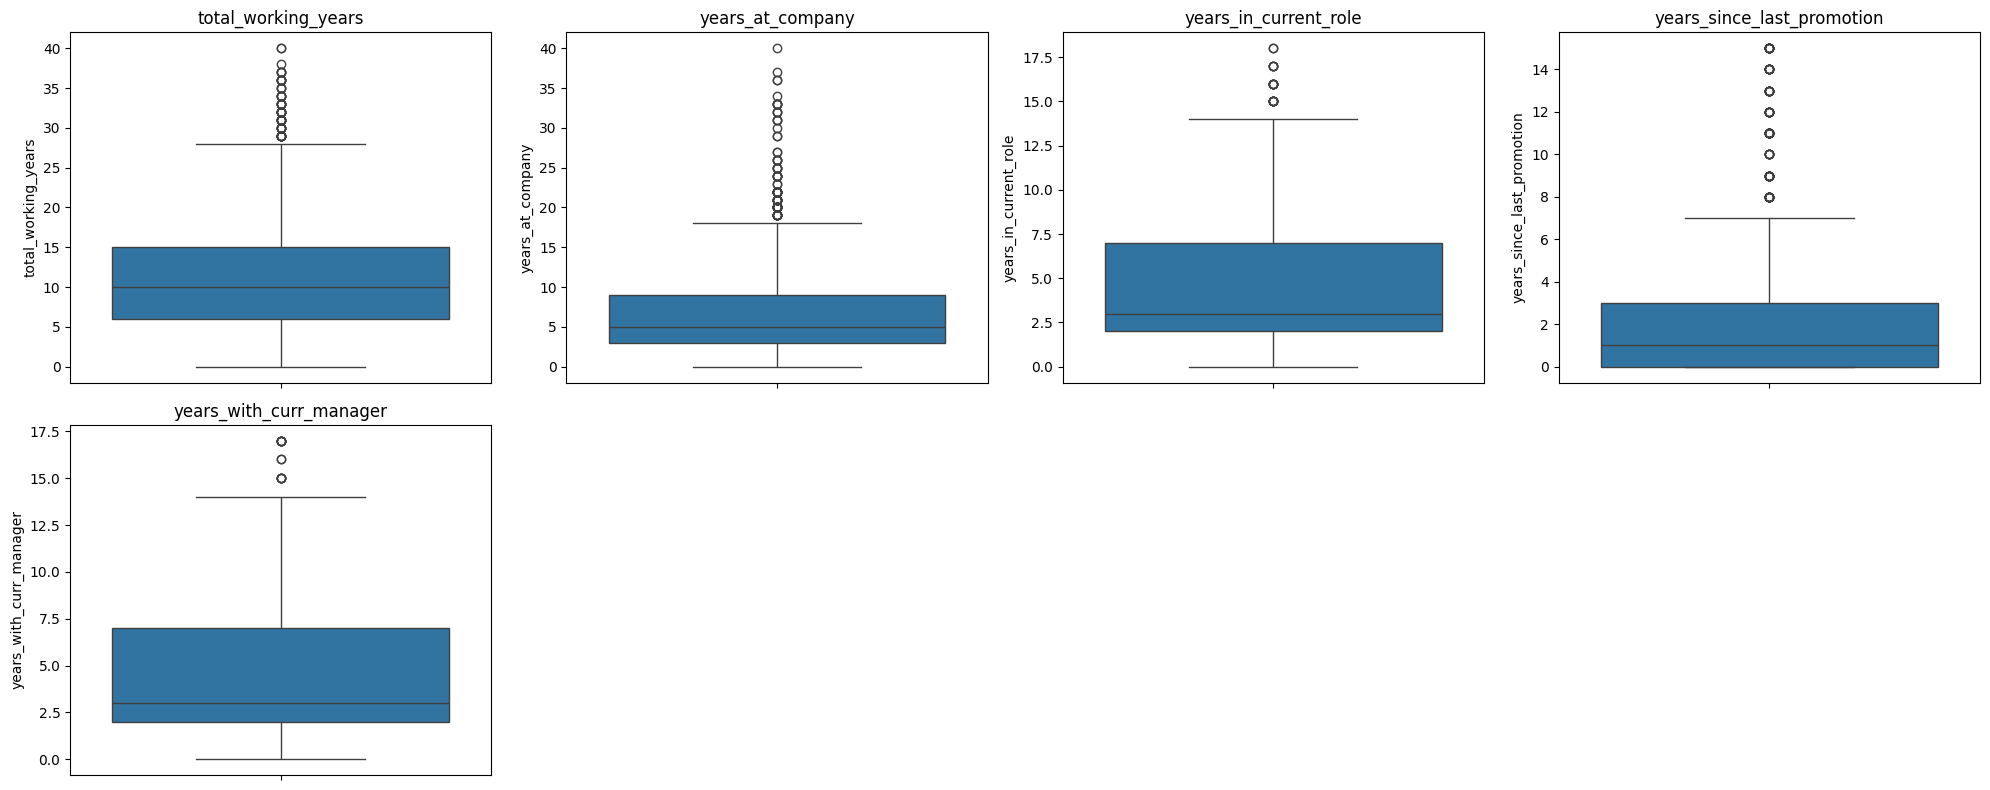

In [154]:
frb.boxplots(dados=dados_years, excluir_classe='employee_number')

### 2. Detec√ß√£o Quantitativa de Outliers pelo M√©todo IQR

Utilizamos a fun√ß√£o para detectar quantitativamente a presen√ßa de outliers em cada vari√°vel:

In [155]:
frb.detectar_outliers_iqr(df=dados_years, excluir_classe='employee_number')

Q1    Q3  AIQ  Min   Max  Limite Inferior  \
total_working_years         6.0  15.0  9.0  0.0  40.0             -7.5   
years_at_company            3.0   9.0  6.0  0.0  40.0             -6.0   
years_in_current_role       2.0   7.0  5.0  0.0  18.0             -5.5   
years_since_last_promotion  0.0   3.0  3.0  0.0  15.0             -4.5   
years_with_curr_manager     2.0   7.0  5.0  0.0  17.0             -5.5   

                            Limite Superior  Qtd Outliers  
total_working_years                    28.5          63.0  
years_at_company                       18.0         104.0  
years_in_current_role                  14.5          21.0  
years_since_last_promotion              7.5         107.0  
years_with_curr_manager                14.5          14.0

### 3. Substitui√ß√£o dos Outliers pela Mediana

Realizamos a substitui√ß√£o dos outliers detectados pelos valores medianos das respectivas vari√°veis, suavizando poss√≠veis distor√ß√µes sem perder a representatividade dos dados:

In [156]:
dados_years = frb.substituir_outliers_mediana(df=dados_years, excluir_classe='employee_number')


### 4. Visualiza√ß√£o P√≥s-Tratamento

Finalmente, geramos novamente os boxplots para verificar se o tratamento foi eficaz na redu√ß√£o dos outliers:

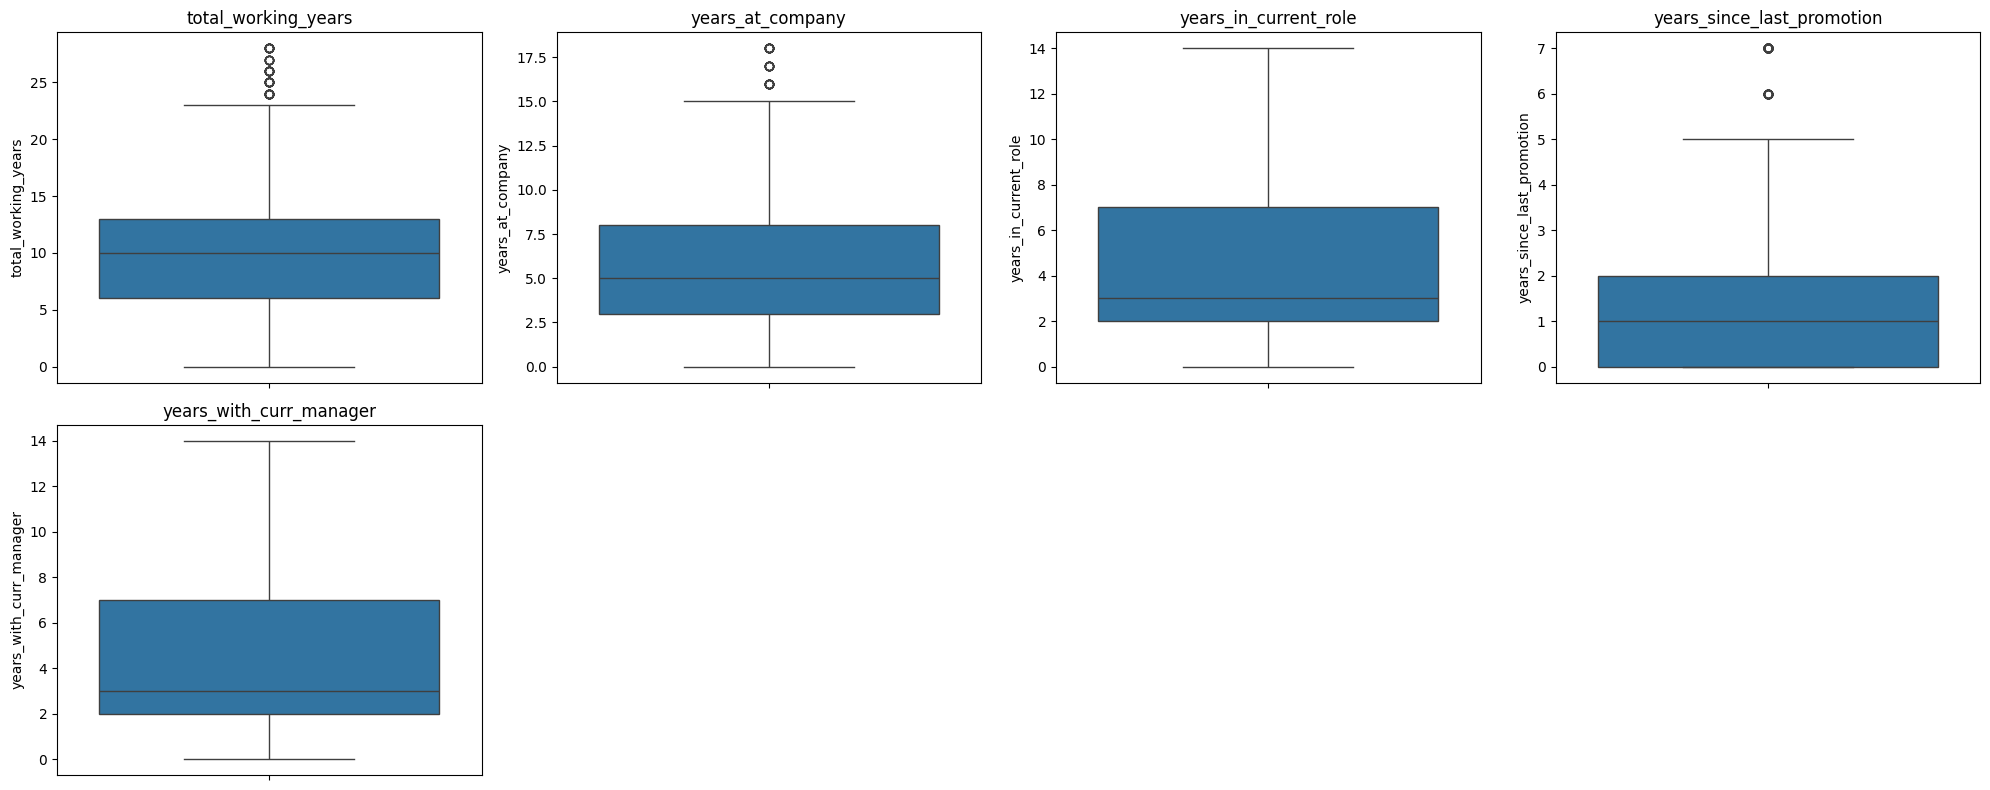

In [157]:
frb.boxplots(dados_years, 'employee_number')

In [158]:
frb.detectar_outliers_iqr(df=dados_years, excluir_classe='employee_number')

Q1    Q3  AIQ  Min   Max  Limite Inferior  \
total_working_years         6.0  13.0  7.0  0.0  28.0             -4.5   
years_at_company            3.0   8.0  5.0  0.0  18.0             -4.5   
years_in_current_role       2.0   7.0  5.0  0.0  14.0             -5.5   
years_since_last_promotion  0.0   2.0  2.0  0.0   7.0             -3.0   
years_with_curr_manager     2.0   7.0  5.0  0.0  14.0             -5.5   

                            Limite Superior  Qtd Outliers  
total_working_years                    23.5          67.0  
years_at_company                       15.5          34.0  
years_in_current_role                  14.5           0.0  
years_since_last_promotion              5.0         108.0  
years_with_curr_manager                14.5           0.0

> üí° Esse procedimento sistem√°tico assegura que os dados temporais estejam limpos e preparados para an√°lise integrada com o dataset principal, evitando impactos negativos em modelos estat√≠sticos causados por valores extremos.

## 12. Visualiza√ß√£o das Distribui√ß√µes das Vari√°veis Temporais

Ap√≥s o tratamento dos outliers, geramos histogramas para visualizar a distribui√ß√£o das vari√°veis temporais no dataset `dados_years`. 

Como de costume, a coluna `employee_number` foi exclu√≠da da visualiza√ß√£o por ser um identificador:

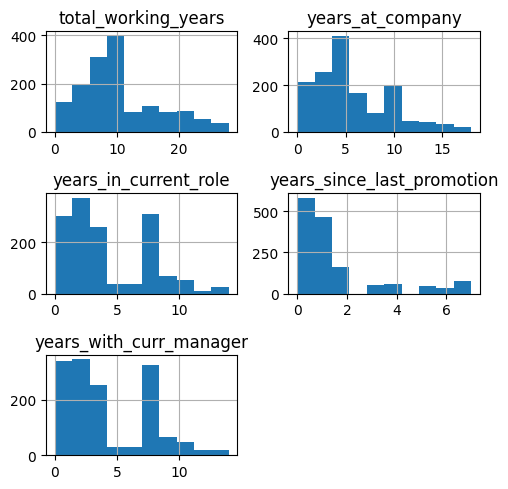

In [159]:
dados_years.drop(columns='employee_number').hist(figsize=(5,5))
plt.tight_layout()
plt.show()

### Objetivos dessa visualiza√ß√£o:

- Observar a forma das distribui√ß√µes das vari√°veis temporais (como anos de servi√ßo, tempo no cargo atual, tempo desde a √∫ltima promo√ß√£o, etc.).
- Identificar poss√≠veis assimetrias ou concentra√ß√µes.
- Suportar decis√µes futuras sobre transforma√ß√µes ou normaliza√ß√µes antes da modelagem.

> üìå A visualiza√ß√£o ajuda a garantir que as vari√°veis estejam adequadamente preparadas para an√°lises estat√≠sticas e para a constru√ß√£o de modelos preditivos.

## 13. Integra√ß√£o dos Conjuntos de Dados

Para consolidar as informa√ß√µes dos funcion√°rios e seus dados temporais em um √∫nico dataset, realizamos a jun√ß√£o (*merge*) dos dois dataframes:

- `dados_hr`: dados principais dos funcion√°rios.
- `dados_years`: dados temporais j√° no formato largo.

Utilizamos a fun√ß√£o `pd.merge` do pandas, combinando os dados com base na coluna comum `employee_number`:

In [160]:
dados_rotatividade_ibm = pd.merge(dados_hr, dados_years, on='employee_number', how='inner')

In [161]:
dados_rotatividade_ibm.head()

employee_number  age attrition    business_travel              department  \
0                1   41       Yes      Travel_Rarely                   Sales   
1                2   49        No  Travel_Frequently  Research & Development   
2                4   37       Yes      Travel_Rarely  Research & Development   
3                5   33        No  Travel_Frequently  Research & Development   
4                7   27        No      Travel_Rarely  Research & Development   

   distance_from_home     education education_field environment_satisfaction  \
0                   1  Some college   Life Sciences                   Medium   
1                   8    No college   Life Sciences                     High   
2                   2  Some college           Other                Very high   
3                   3       Masters   Life Sciences                Very high   
4                   2    No college         Medical                      Low   

   gender job_involvement               job_role job_satisfaction  \
0  Female            High        Sales Executive        Very high   
1    Male          Medium     Research Scientist           Medium   
2    Male          Medium  Laboratory Technician             High   
3  Female            High     Research Scientist             High   
4    Male            High  Laboratory Technician           Medium   

  marital_status  monthly_income  num_companies_worked over_time  \
0         Single            5993                     8       Yes   
1        Married            5130                     1        No   
2         Single            2090                     6       Yes   
3        Married            2909                     1       Yes   
4        Married            3468                     2        No   

   percent_salary_hike performance_rating relationship_satisfaction  \
0                   11          Excellent                       Low   
1                   23        Outstanding                 Very high   
2                   15          Excellent                    Medium   
3                   11          Excellent                      High   
4                   12          Excellent                 Very high   

   training_times_last_year work_life_balance  total_working_years  \
0                         3               Bad                    8   
1                         3            Better                   10   
2                         3            Better                    7   
3                         3            Better                    8   
4                         3            Better                    6   

   years_at_company  years_in_current_role  years_since_last_promotion  \
0                 6                      4                           0   
1                10                      7                           1   
2                 0                      0                           0   
3                 8                      7                           3   
4                 2                      2                           2   

   years_with_curr_manager  
0                        5  
1                        7  
2                        0  
3                        0  
4                        2

### Detalhes da opera√ß√£o:

- `on='employee_number'`: chave utilizada para combinar as observa√ß√µes correspondentes.
- `how='inner'`: mant√©m apenas os funcion√°rios que est√£o presentes em ambos os datasets, garantindo dados completos para an√°lise.

O resultado √© um dataframe consolidado, `dados_rotatividade_ibm`, contendo tanto as informa√ß√µes demogr√°ficas e profissionais quanto as vari√°veis temporais para cada funcion√°rio.

## 14. Verifica√ß√£o da Estrutura e Qualidade do Dataset Consolidado

Ap√≥s a jun√ß√£o dos datasets, realizamos uma inspe√ß√£o detalhada do novo dataframe `dados_rotatividade_ibm` para garantir a integridade e adequa√ß√£o dos dados para an√°lise:

In [162]:
print(dados_rotatividade_ibm.shape)
print(dados_rotatividade_ibm.info())
print(dados_rotatividade_ibm.isna().sum())

(1470, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   employee_number             1470 non-null   int64 
 1   age                         1470 non-null   int64 
 2   attrition                   1470 non-null   object
 3   business_travel             1470 non-null   object
 4   department                  1470 non-null   object
 5   distance_from_home          1470 non-null   int64 
 6   education                   1470 non-null   object
 7   education_field             1470 non-null   object
 8   environment_satisfaction    1470 non-null   object
 9   gender                      1470 non-null   object
 10  job_involvement             1470 non-null   object
 11  job_role                    1470 non-null   object
 12  job_satisfaction            1470 non-null   object
 13  marital_status              1470 non-

### Objetivos dessa inspe√ß√£o:

* **Shape:** Confirmar o n√∫mero de observa√ß√µes e vari√°veis no dataset consolidado.
* **Info:** Verificar os tipos de dados para cada coluna, garantindo que estejam corretos para an√°lises futuras.
* **Valores Ausentes:** Identificar e quantificar poss√≠veis dados faltantes para tratamento posterior.

> üõ†Ô∏è Essa etapa √© crucial para assegurar que a uni√£o dos datasets n√£o tenha gerado inconsist√™ncias, e para preparar o conjunto para as pr√≥ximas etapas de modelagem.

Beleza! Aqui vai um markdown explicativo para essas a√ß√µes finais que voc√™ fez ‚Äî exportar o dataset consolidado e remover a coluna de ID para a modelagem:

## 15. Exporta√ß√£o dos Dados Consolidados e Prepara√ß√£o para Modelagem

Ap√≥s a consolida√ß√£o e verifica√ß√£o dos dados, realizamos as seguintes opera√ß√µes:

### 1. Exporta√ß√£o para arquivo CSV

Salvamos o dataframe `dados_rotatividade_ibm` em um arquivo CSV para armazenamento e uso futuro:

In [163]:
dados_rotatividade_ibm.to_csv('dados_ibm_rotatividade.csv', index=False)

In [164]:
dados_rotatividade_ibm.head()

employee_number  age attrition    business_travel              department  \
0                1   41       Yes      Travel_Rarely                   Sales   
1                2   49        No  Travel_Frequently  Research & Development   
2                4   37       Yes      Travel_Rarely  Research & Development   
3                5   33        No  Travel_Frequently  Research & Development   
4                7   27        No      Travel_Rarely  Research & Development   

   distance_from_home     education education_field environment_satisfaction  \
0                   1  Some college   Life Sciences                   Medium   
1                   8    No college   Life Sciences                     High   
2                   2  Some college           Other                Very high   
3                   3       Masters   Life Sciences                Very high   
4                   2    No college         Medical                      Low   

   gender job_involvement               job_role job_satisfaction  \
0  Female            High        Sales Executive        Very high   
1    Male          Medium     Research Scientist           Medium   
2    Male          Medium  Laboratory Technician             High   
3  Female            High     Research Scientist             High   
4    Male            High  Laboratory Technician           Medium   

  marital_status  monthly_income  num_companies_worked over_time  \
0         Single            5993                     8       Yes   
1        Married            5130                     1        No   
2         Single            2090                     6       Yes   
3        Married            2909                     1       Yes   
4        Married            3468                     2        No   

   percent_salary_hike performance_rating relationship_satisfaction  \
0                   11          Excellent                       Low   
1                   23        Outstanding                 Very high   
2                   15          Excellent                    Medium   
3                   11          Excellent                      High   
4                   12          Excellent                 Very high   

   training_times_last_year work_life_balance  total_working_years  \
0                         3               Bad                    8   
1                         3            Better                   10   
2                         3            Better                    7   
3                         3            Better                    8   
4                         3            Better                    6   

   years_at_company  years_in_current_role  years_since_last_promotion  \
0                 6                      4                           0   
1                10                      7                           1   
2                 0                      0                           0   
3                 8                      7                           3   
4                 2                      2                           2   

   years_with_curr_manager  
0                        5  
1                        7  
2                        0  
3                        0  
4                        2

* `index=False` evita salvar o √≠ndice do dataframe no arquivo, deixando o CSV mais limpo e adequado para an√°lises posteriores.

### 2. Remo√ß√£o da coluna `employee_number`

Como o identificador √∫nico dos funcion√°rios (`employee_number`) n√£o possui valor preditivo e pode atrapalhar a modelagem, removemos essa coluna:

In [165]:
dados_rotatividade_ibm.drop(columns='employee_number', inplace=True)

> üßπ Essa limpeza final garante que os dados estejam prontos para as etapas seguintes, como codifica√ß√£o, an√°lise explorat√≥ria detalhada e constru√ß√£o do modelo preditivo.

## 16. Convers√£o da Vari√°vel Alvo `Attrition` para Formato Num√©rico

Para facilitar a modelagem estat√≠stica, convertemos a vari√°vel alvo `Attrition` que originalmente cont√©m valores categ√≥ricos `'Yes'` e `'No'` para um formato num√©rico bin√°rio:

### 1. Defini√ß√£o da fun√ß√£o de convers√£o

Criamos uma fun√ß√£o simples que atribui o valor 1 para `'Yes'` (funcion√°rio que saiu) e 0 para `'No'` (funcion√°rio que permaneceu):

In [166]:
def aplicar_valor(value):
    if value == 'Yes':
        return 1
    else:
        return 0


### 2. Aplica√ß√£o da fun√ß√£o na coluna `Attrition`

Utilizamos o m√©todo `.apply()` para aplicar essa fun√ß√£o a toda a coluna, criando assim uma nova coluna `attrition` com valores bin√°rios:

In [167]:
dados_rotatividade_ibm['attrition'] = dados_rotatividade_ibm['attrition'].apply(aplicar_valor)

### Resultado esperado:

* `attrition = 1` ‚Üí Funcion√°rio deixou a empresa.
* `attrition = 0` ‚Üí Funcion√°rio permaneceu na empresa.

> üéØ Essa transforma√ß√£o √© fundamental para alimentar modelos de classifica√ß√£o bin√°ria, como a regress√£o log√≠stica, que requerem vari√°veis dependentes num√©ricas.

## 17. An√°lise da Distribui√ß√£o da Vari√°vel Alvo (`attrition`)

Ap√≥s a convers√£o da vari√°vel `Attrition` para formato num√©rico bin√°rio, realizamos uma an√°lise de distribui√ß√£o para verificar a propor√ß√£o de funcion√°rios que sa√≠ram da empresa em rela√ß√£o aos que permaneceram.

### C√≥digo executado:

In [168]:
# Distribui√ß√£o da vari√°vel alvo
print(dados_rotatividade_ibm['attrition'].value_counts(normalize=True))
sns.countplot(x='attrition', data=dados_rotatividade_ibm)
plt.title("Distribui√ß√£o da vari√°vel alvo")
plt.show()

attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64



### Interpreta√ß√£o:

* O m√©todo `value_counts(normalize=True)` mostra a **propor√ß√£o relativa** dos valores `0` (permaneceu) e `1` (saiu).
* O gr√°fico de barras (`countplot`) permite visualizar claramente a **diferen√ßa no n√∫mero de registros** entre as duas classes.

### Observa√ß√£o:

A an√°lise revelou um **desbalanceamento entre as classes**:

* A classe `0` (funcion√°rios que permaneceram na empresa) √© **significativamente mais frequente** do que a classe `1` (funcion√°rios que sa√≠ram).
* Esse desbalanceamento pode afetar negativamente a performance de modelos preditivos, que podem ser tendenciosos a prever a classe majorit√°ria.

> üß† **Importante:** Em etapas futuras, ser√° necess√°rio aplicar t√©cnicas de balanceamento de classes (como `SMOTE`, `undersampling`, `class_weight`, etc.) para garantir que o modelo aprenda a identificar corretamente os casos de rotatividade (classe 1).

Excelente! Esse bloco √© fundamental para a **an√°lise explorat√≥ria das vari√°veis categ√≥ricas** com rela√ß√£o √† vari√°vel alvo `attrition`. Abaixo est√° um markdown explicativo bem completo para documentar essa etapa do seu notebook:

## 18. An√°lise Explorat√≥ria das Vari√°veis Categ√≥ricas

Nesta etapa, exploramos o comportamento das vari√°veis categ√≥ricas em rela√ß√£o √† vari√°vel alvo `attrition`. O objetivo √© identificar padr√µes, associa√ß√µes ou diferen√ßas relevantes entre as categorias e a rotatividade de funcion√°rios.

### 1. Identifica√ß√£o das vari√°veis categ√≥ricas e num√©ricas

Primeiramente, separamos as colunas categ√≥ricas e num√©ricas do dataset:

In [169]:
cat_vars = dados_rotatividade_ibm.select_dtypes(include='object').columns.tolist()
num_vars = dados_rotatividade_ibm.select_dtypes(include=np.number).columns.tolist()
num_vars.remove('attrition') if 'attrition' in num_vars else None

* `cat_vars`: lista de colunas com tipo `object` (categ√≥ricas).
* `num_vars`: lista de colunas num√©ricas, excluindo a vari√°vel alvo `attrition`.

### 2. Visualiza√ß√£o e an√°lise de impacto da `attrition` em cada vari√°vel categ√≥rica

Para cada vari√°vel categ√≥rica, realizamos:

* **Gr√°fico de barras segmentado pela vari√°vel alvo (`attrition`)**:

  * Permite visualizar a distribui√ß√£o das sa√≠das (`1`) e perman√™ncias (`0`) dentro de cada categoria.
* **Tabela cruzada de propor√ß√µes normalizada por linha**:

  * Mostra a **distribui√ß√£o percentual de `attrition`** dentro de cada valor da vari√°vel categ√≥rica.


Distribui√ß√£o percentual de target por business_travel:
 attrition                 0         1
business_travel                      
Non-Travel         0.920000  0.080000
Travel_Frequently  0.750903  0.249097
Travel_Rarely      0.850431  0.149569


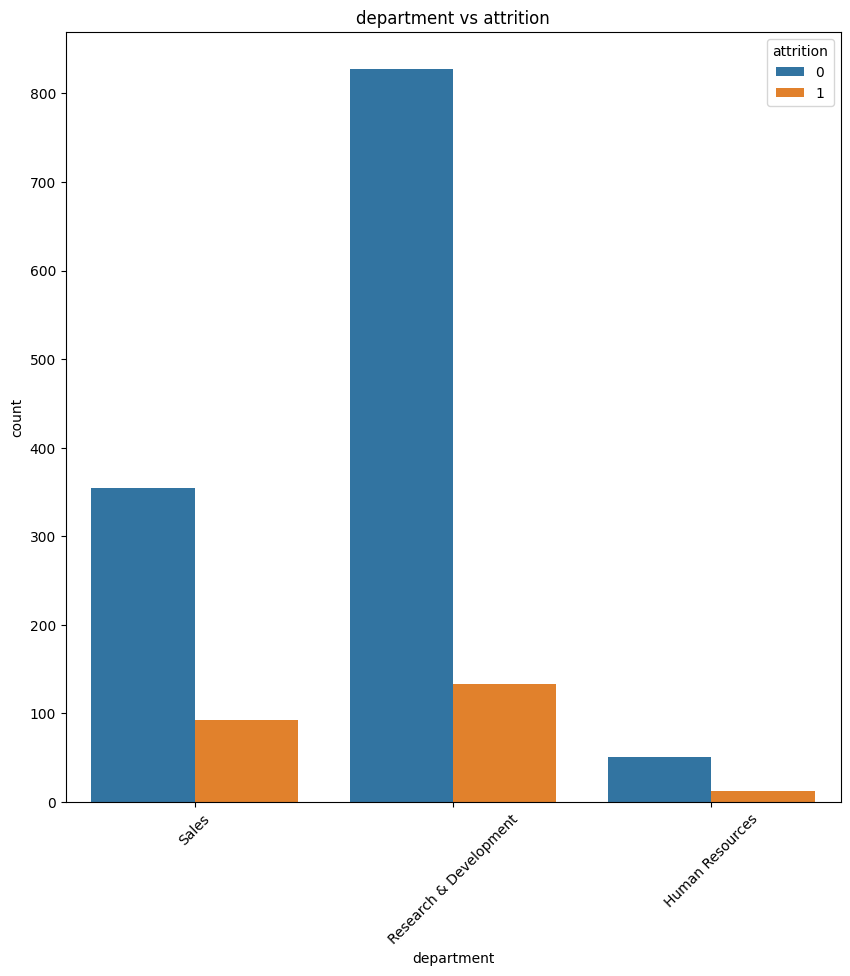


Distribui√ß√£o percentual de target por department:
 attrition                      0         1
department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278



Distribui√ß√£o percentual de target por education:
 attrition            0         1
education                       
Bachelors     0.826923  0.173077
Doctorate     0.895833  0.104167
Masters       0.854271  0.145729
No college    0.817647  0.182353
Some college  0.843972  0.156028



Distribui√ß√£o percentual de target por education_field:
 attrition                0         1
education_field                     
Human Resources   0.740741  0.259259
Life Sciences     0.853135  0.146865
Marketing         0.779874  0.220126
Medical           0.864224  0.135776
Other             0.865854  0.134146
Technical Degree  0.757576  0.242424



Distribui√ß√£o percentual de target por environment_satisfaction:
 attrition                        0         1
environment_satisfaction                    
High                      0.863135  0.136865
Low                       0.746479  0.253521
Medium                    0.850174  0.149826
Very high                 0.865471  0.134529



Distribui√ß√£o percentual de target por gender:
 attrition         0         1
gender                       
Female     0.852041  0.147959
Male       0.829932  0.170068


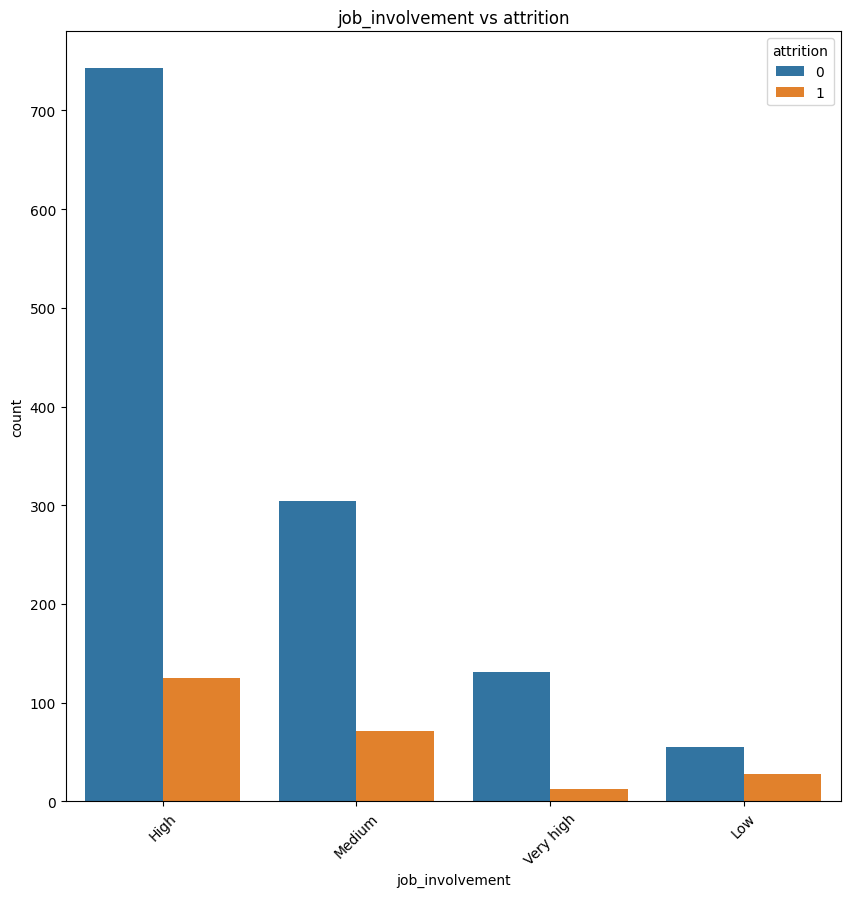


Distribui√ß√£o percentual de target por job_involvement:
 attrition               0         1
job_involvement                    
High             0.855991  0.144009
Low              0.662651  0.337349
Medium           0.810667  0.189333
Very high        0.909722  0.090278


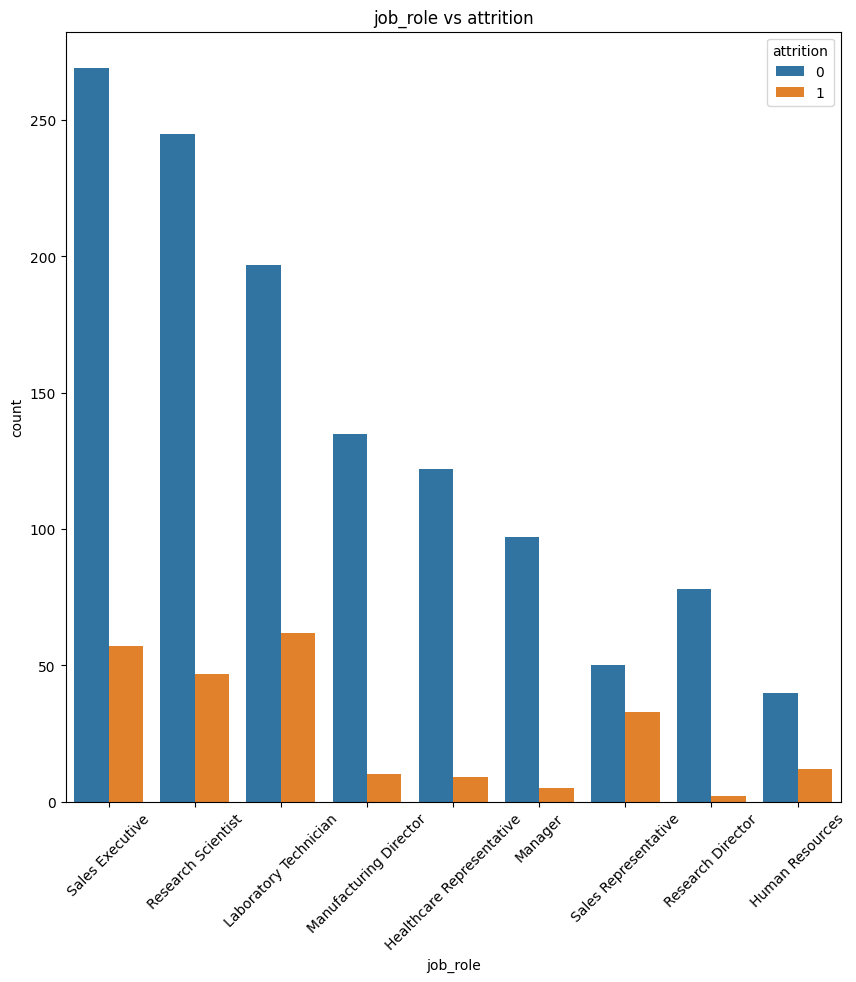


Distribui√ß√£o percentual de target por job_role:
 attrition                         0         1
job_role                                     
Healthcare Representative  0.931298  0.068702
Human Resources            0.769231  0.230769
Laboratory Technician      0.760618  0.239382
Manager                    0.950980  0.049020
Manufacturing Director     0.931034  0.068966
Research Director          0.975000  0.025000
Research Scientist         0.839041  0.160959
Sales Executive            0.825153  0.174847
Sales Representative       0.602410  0.397590



Distribui√ß√£o percentual de target por job_satisfaction:
 attrition                0         1
job_satisfaction                    
High              0.834842  0.165158
Low               0.771626  0.228374
Medium            0.835714  0.164286
Very high         0.886710  0.113290



Distribui√ß√£o percentual de target por marital_status:
 attrition              0         1
marital_status                    
Divorced        0.899083  0.100917
Married         0.875186  0.124814
Single          0.744681  0.255319


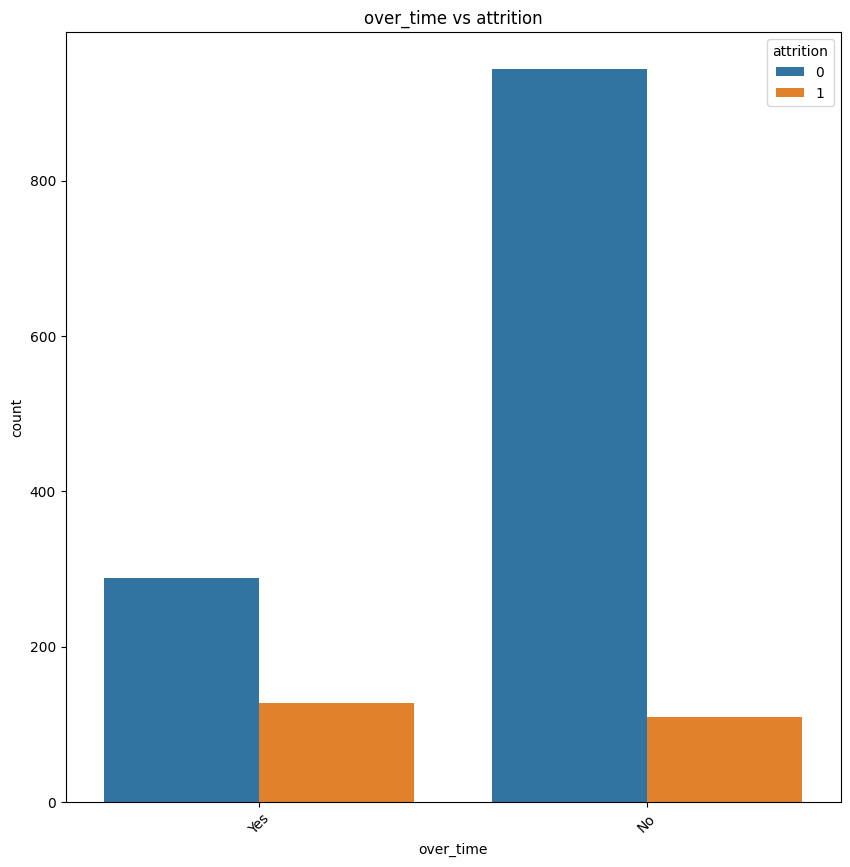


Distribui√ß√£o percentual de target por over_time:
 attrition         0         1
over_time                    
No         0.895636  0.104364
Yes        0.694712  0.305288


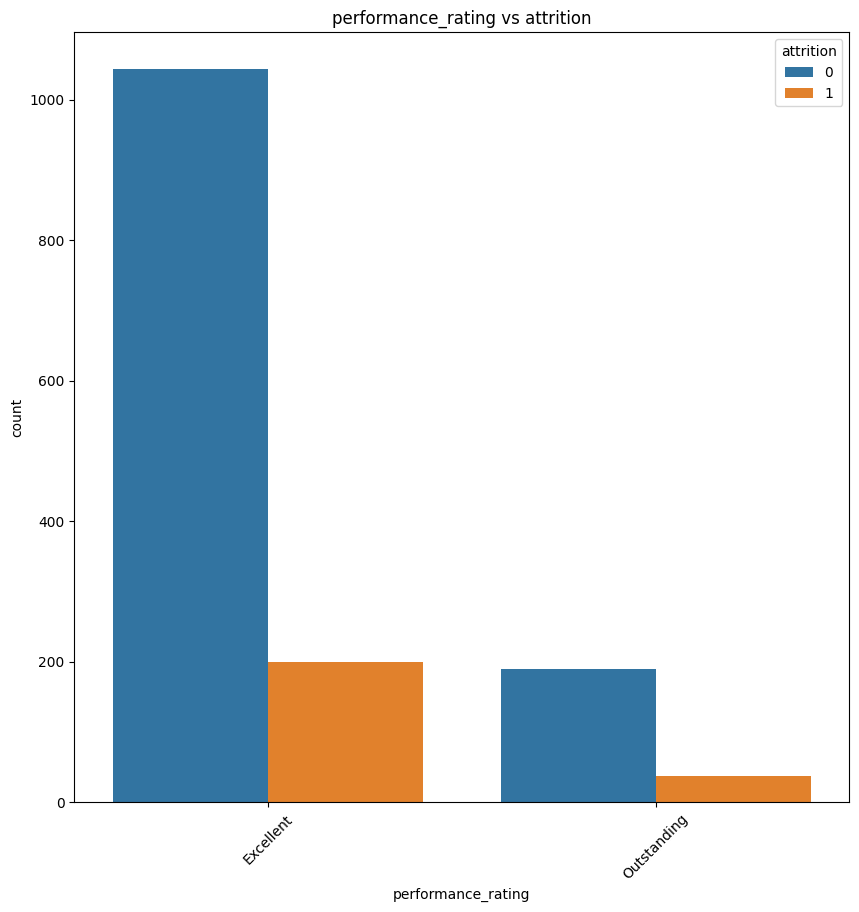


Distribui√ß√£o percentual de target por performance_rating:
 attrition                  0         1
performance_rating                    
Excellent           0.839228  0.160772
Outstanding         0.836283  0.163717


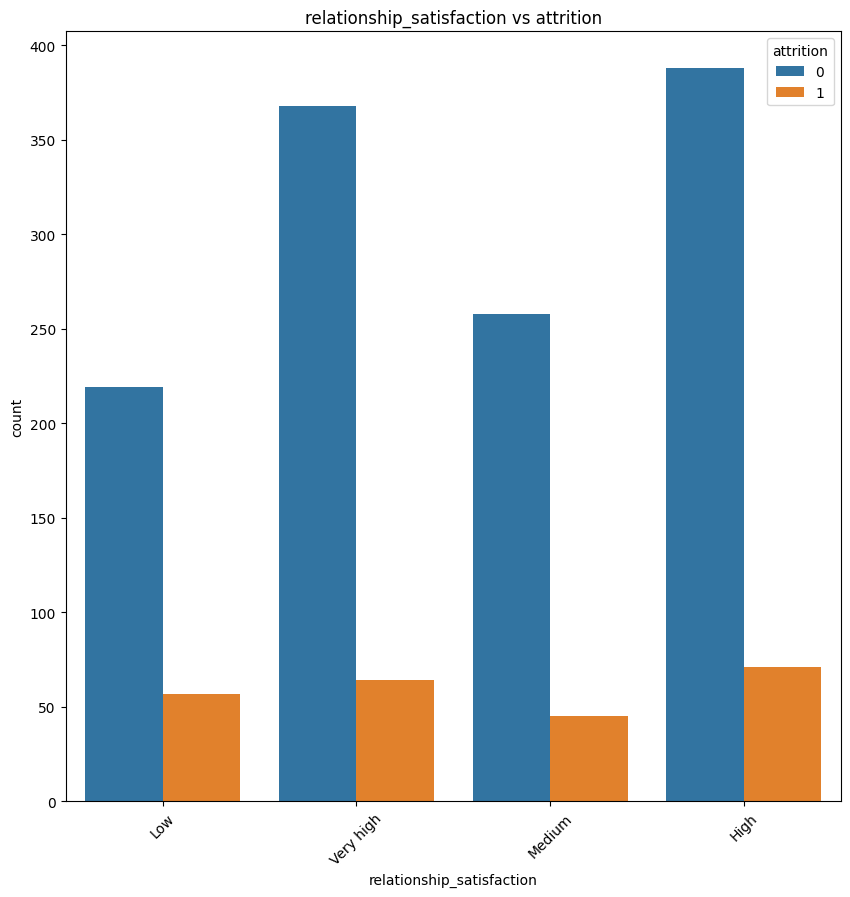


Distribui√ß√£o percentual de target por relationship_satisfaction:
 attrition                         0         1
relationship_satisfaction                    
High                       0.845316  0.154684
Low                        0.793478  0.206522
Medium                     0.851485  0.148515
Very high                  0.851852  0.148148


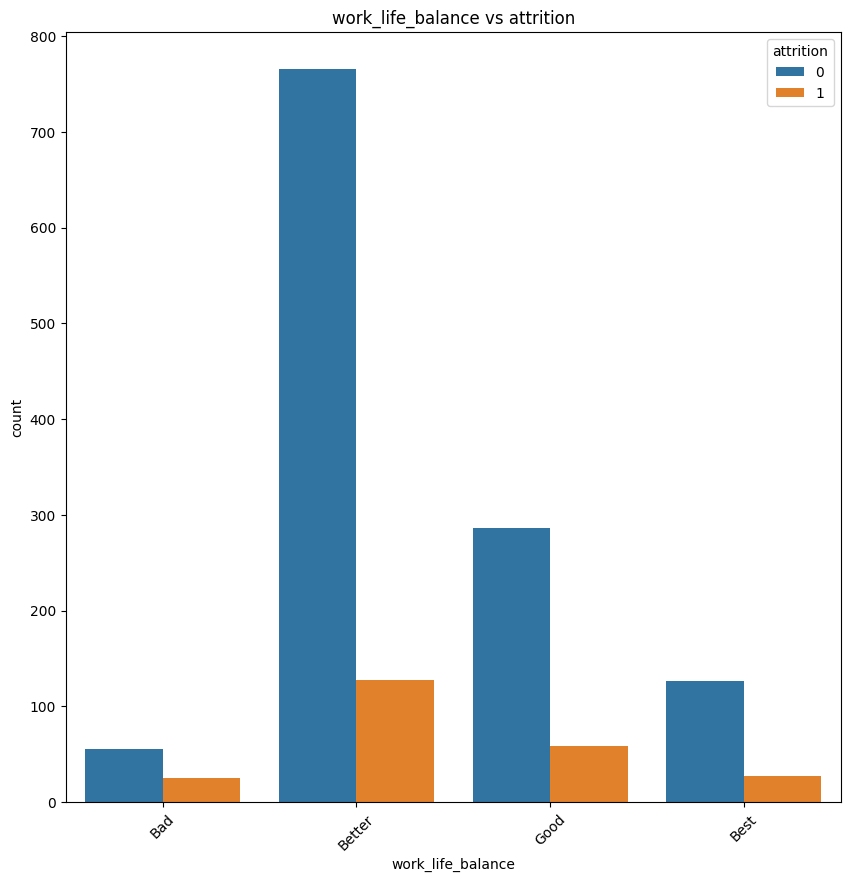


Distribui√ß√£o percentual de target por work_life_balance:
 attrition                 0         1
work_life_balance                    
Bad                0.687500  0.312500
Best               0.823529  0.176471
Better             0.857783  0.142217
Good               0.831395  0.168605


In [170]:
for col in cat_vars:
    plt.figure(figsize=(10, 10))
    sns.countplot(x=col, hue='attrition', data=dados_rotatividade_ibm)
    plt.title(f'{col} vs attrition')
    plt.xticks(rotation=45)
    plt.show()

    # Tabela cruzada (propor√ß√£o por classe da target)
    cross = pd.crosstab(dados_rotatividade_ibm[col], dados_rotatividade_ibm['attrition'], normalize='index')
    print(f'\nDistribui√ß√£o percentual de target por {col}:\n', cross)


### üîé Objetivo:

* Identificar **categorias com maior probabilidade de rotatividade**.
* Detectar poss√≠veis vari√°veis com **poder preditivo**.
* Orientar o processo de engenharia de vari√°veis e codifica√ß√£o.

## 19. An√°lise Explorat√≥ria das Vari√°veis Num√©ricas

Nesta etapa, exploramos as **vari√°veis num√©ricas** do dataset para entender seu comportamento geral e sua rela√ß√£o com a vari√°vel alvo `attrition`.

### Bloco de c√≥digo executado:

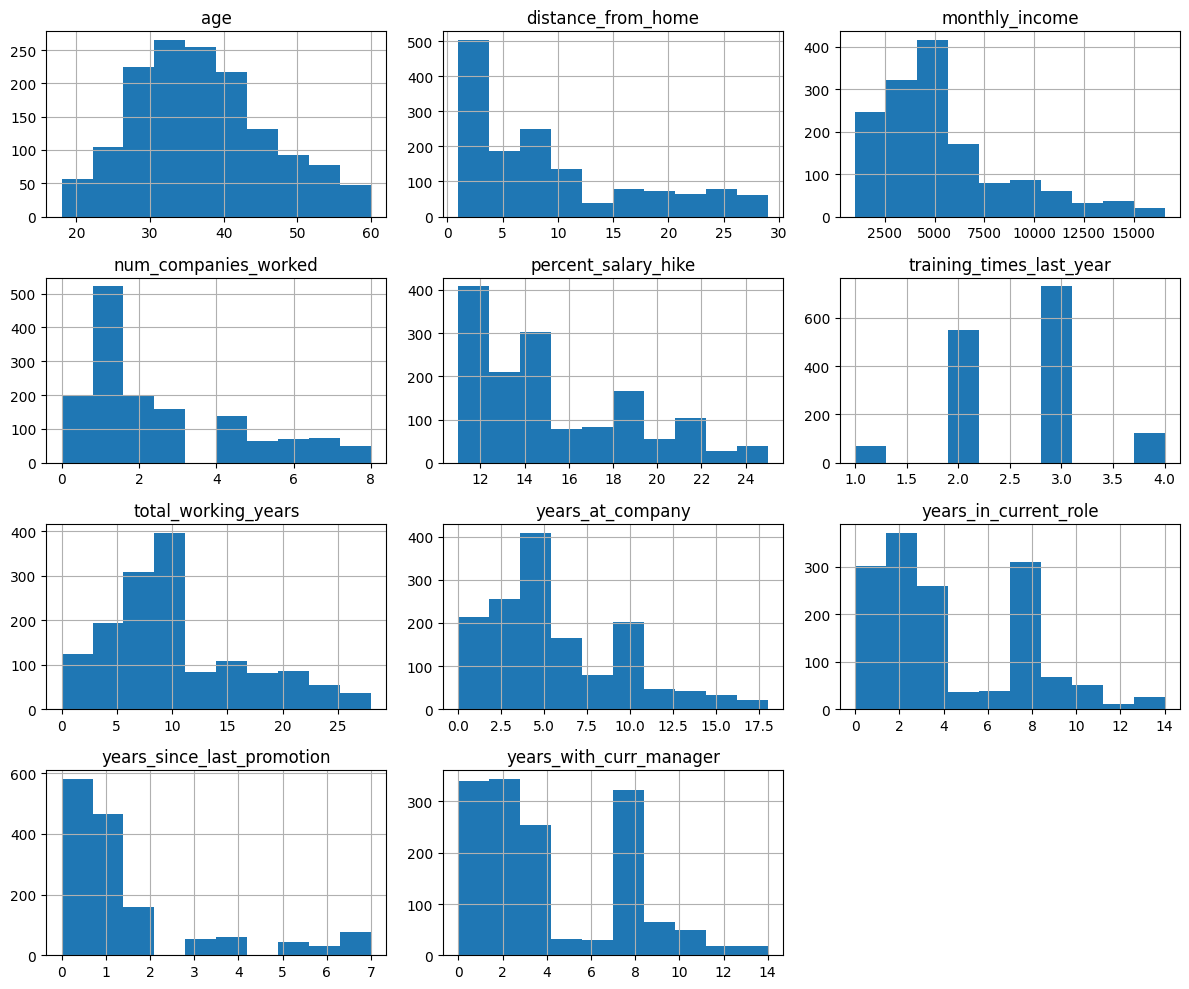

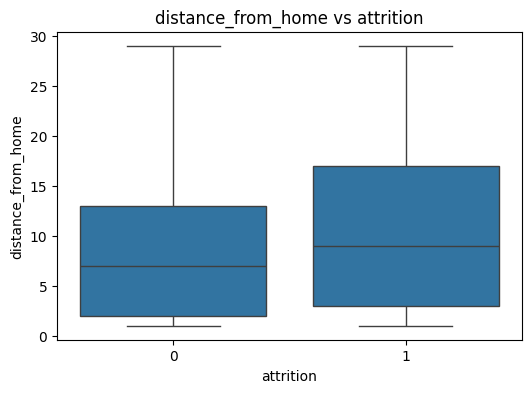

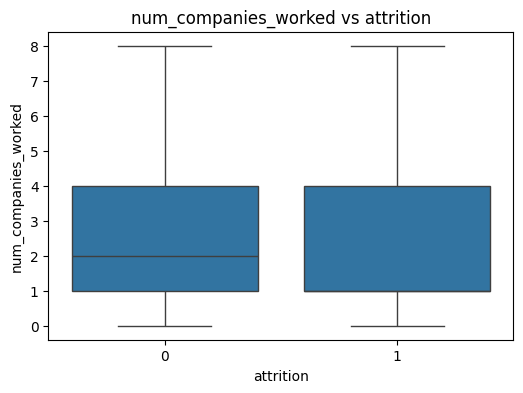

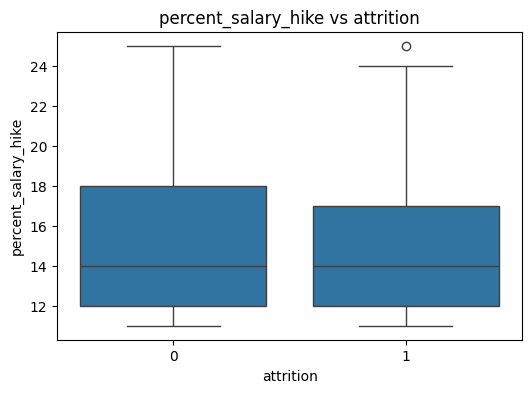

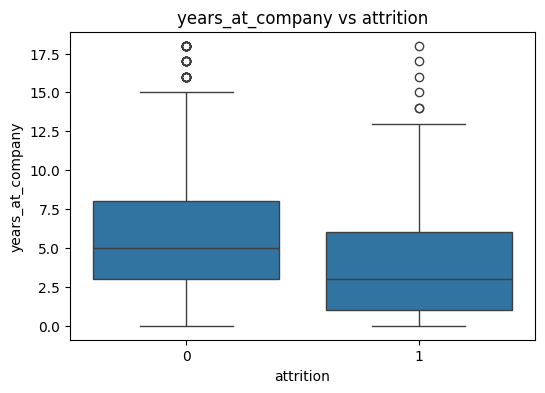

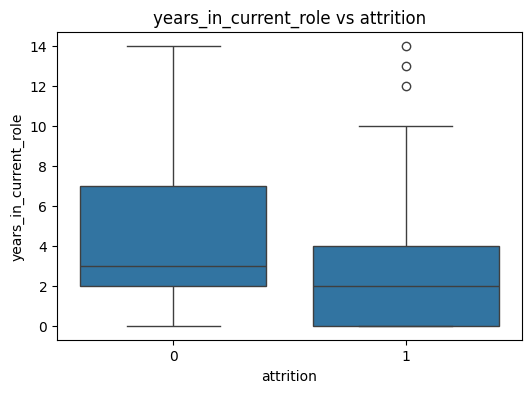

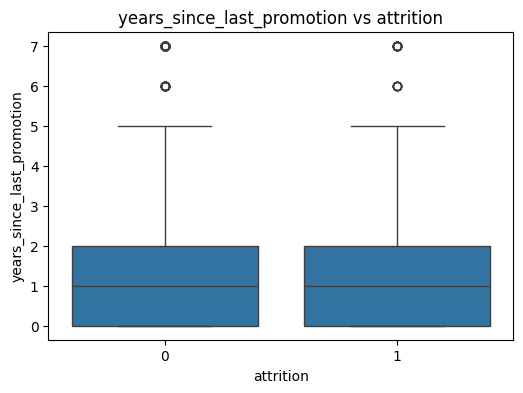

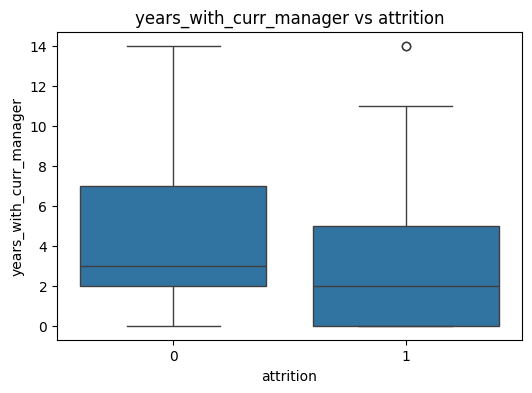

In [171]:
# Histograma
dados_rotatividade_ibm[num_vars].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Boxplots por classe da vari√°vel alvo
for col in num_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='attrition', y=col, data=dados_rotatividade_ibm)
    plt.title(f'{col} vs attrition')
    plt.show()


### üîπ 1. Histogramas

Os histogramas ajudam a visualizar:

* A **distribui√ß√£o das vari√°veis num√©ricas** (sim√©trica, assim√©trica, cauda longa, etc.).
* A presen√ßa de **valores concentrados ou extremos**.
* Vari√°veis com distribui√ß√µes potencialmente problem√°ticas para modelagem.

---

### üî∏ 2. Boxplots segmentados por `attrition`

Os boxplots comparam a distribui√ß√£o de cada vari√°vel num√©rica **entre os funcion√°rios que sa√≠ram e os que permaneceram**. Permitem:

* Identificar **diferen√ßas nos padr√µes entre as classes**.
* Detectar vari√°veis que apresentam **separa√ß√£o visual clara** entre `attrition = 0` e `attrition = 1`.
* Apoiar a sele√ß√£o de vari√°veis relevantes para a modelagem preditiva.

> üí° Boxplots s√£o especialmente √∫teis para destacar **diferen√ßas de mediana**, **dispers√£o** e **outliers** entre os grupos.

Perfeito! A an√°lise de correla√ß√£o √© uma etapa essencial para entender o relacionamento entre as vari√°veis e antecipar poss√≠veis problemas de multicolinearidade. Aqui est√° o markdown explicativo completo para essa parte:

---

````markdown
## 20. An√°lise de Correla√ß√£o

Nesta etapa, analisamos a matriz de correla√ß√£o entre as vari√°veis num√©ricas, incluindo a vari√°vel alvo `attrition`, para entender o grau de associa√ß√£o entre elas.

### Bloco de c√≥digo executado:

In [172]:
correlation = dados_rotatividade_ibm[num_vars + ['attrition']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correla√ß√£o')
plt.show()


In [173]:
dados_rotatividade_ibm.head()

age  attrition    business_travel              department  \
0   41          1      Travel_Rarely                   Sales   
1   49          0  Travel_Frequently  Research & Development   
2   37          1      Travel_Rarely  Research & Development   
3   33          0  Travel_Frequently  Research & Development   
4   27          0      Travel_Rarely  Research & Development   

   distance_from_home     education education_field environment_satisfaction  \
0                   1  Some college   Life Sciences                   Medium   
1                   8    No college   Life Sciences                     High   
2                   2  Some college           Other                Very high   
3                   3       Masters   Life Sciences                Very high   
4                   2    No college         Medical                      Low   

   gender job_involvement               job_role job_satisfaction  \
0  Female            High        Sales Executive        Very high   
1    Male          Medium     Research Scientist           Medium   
2    Male          Medium  Laboratory Technician             High   
3  Female            High     Research Scientist             High   
4    Male            High  Laboratory Technician           Medium   

  marital_status  monthly_income  num_companies_worked over_time  \
0         Single            5993                     8       Yes   
1        Married            5130                     1        No   
2         Single            2090                     6       Yes   
3        Married            2909                     1       Yes   
4        Married            3468                     2        No   

   percent_salary_hike performance_rating relationship_satisfaction  \
0                   11          Excellent                       Low   
1                   23        Outstanding                 Very high   
2                   15          Excellent                    Medium   
3                   11          Excellent                      High   
4                   12          Excellent                 Very high   

   training_times_last_year work_life_balance  total_working_years  \
0                         3               Bad                    8   
1                         3            Better                   10   
2                         3            Better                    7   
3                         3            Better                    8   
4                         3            Better                    6   

   years_at_company  years_in_current_role  years_since_last_promotion  \
0                 6                      4                           0   
1                10                      7                           1   
2                 0                      0                           0   
3                 8                      7                           3   
4                 2                      2                           2   

   years_with_curr_manager  
0                        5  
1                        7  
2                        0  
3                        0  
4                        2

### Objetivos da an√°lise:

* Verificar se **alguma vari√°vel independente possui forte correla√ß√£o com a vari√°vel alvo `attrition`**.
* Identificar **correla√ß√£o forte entre vari√°veis independentes**, o que pode indicar **redund√¢ncia de informa√ß√£o** (multicolinearidade).

---

### Observa√ß√µes:

* Nenhuma vari√°vel apresentou **correla√ß√£o forte (>|0.7|)** com a vari√°vel dependente `attrition`, indicando que **a rela√ß√£o entre a vari√°vel alvo e os preditores √© fraca linearmente** ‚Äî o que √© comum em problemas de rotatividade e n√£o inviabiliza a modelagem.
* Algumas vari√°veis independentes apresentaram **correla√ß√£o significativa entre si**, o que pode indicar **multicolinearidade**. Isso deve ser levado em considera√ß√£o especialmente para **modelos lineares** (como regress√£o log√≠stica), pois pode afetar a **estabilidade dos coeficientes** e a **interpreta√ß√£o dos resultados**.

> üìâ Em modelos baseados em √°rvores (como Random Forest ou XGBoost), a multicolinearidade geralmente n√£o √© um problema, mas em modelos estat√≠sticos, pode ser necess√°rio realizar **an√°lise de vari√¢ncia inflacionada (VIF)** ou aplicar t√©cnicas como **sele√ß√£o de vari√°veis (ex: stepwise)**.

## 21. Codifica√ß√£o de Vari√°veis Categ√≥ricas e Padroniza√ß√£o de Nomes de Colunas

Antes de treinar modelos preditivos, precisamos garantir que todas as vari√°veis estejam em formato num√©rico. Para isso, realizamos a **codifica√ß√£o das vari√°veis categ√≥ricas** usando a t√©cnica de **One-Hot Encoding**.

### 1. One-Hot Encoding com `pd.get_dummies()`

Transformamos todas as vari√°veis categ√≥ricas em colunas bin√°rias (0 ou 1), utilizando a fun√ß√£o `pd.get_dummies`:

In [174]:
dados_rotatividade_ibm = pd.get_dummies(data=dados_rotatividade_ibm, columns=cat_vars, drop_first=True, dtype='int64')

In [175]:
dados_rotatividade_ibm.head()

age  attrition  distance_from_home  monthly_income  num_companies_worked  \
0   41          1                   1            5993                     8   
1   49          0                   8            5130                     1   
2   37          1                   2            2090                     6   
3   33          0                   3            2909                     1   
4   27          0                   2            3468                     2   

   percent_salary_hike  training_times_last_year  total_working_years  \
0                   11                         3                    8   
1                   23                         3                   10   
2                   15                         3                    7   
3                   11                         3                    8   
4                   12                         3                    6   

   years_at_company  years_in_current_role  years_since_last_promotion  \
0                 6                      4                           0   
1                10                      7                           1   
2                 0                      0                           0   
3                 8                      7                           3   
4                 2                      2                           2   

   years_with_curr_manager  business_travel_Travel_Frequently  \
0                        5                                  0   
1                        7                                  1   
2                        0                                  0   
3                        0                                  1   
4                        2                                  0   

   business_travel_Travel_Rarely  department_Research & Development  \
0                              1                                  0   
1                              0                                  1   
2                              1                                  1   
3                              0                                  1   
4                              1                                  1   

   department_Sales  education_Doctorate  education_Masters  \
0                 1                    0                  0   
1                 0                    0                  0   
2                 0                    0                  0   
3                 0                    0                  1   
4                 0                    0                  0   

   education_No college  education_Some college  \
0                     0                       1   
1                     1                       0   
2                     0                       1   
3                     0                       0   
4                     1                       0   

   education_field_Life Sciences  education_field_Marketing  \
0                              1                          0   
1                              1                          0   
2                              0                          0   
3                              1                          0   
4                              0                          0   

   education_field_Medical  education_field_Other  \
0                        0                      0   
1                        0                      0   
2                        0                      1   
3                        0                      0   
4                        1                      0   

   education_field_Technical Degree  environment_satisfaction_Low  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             0   
4                                 0                             1   

   environment_satisfaction

* `columns=cat_vars`: aplica a codifica√ß√£o apenas nas colunas categ√≥ricas previamente identificadas.
* `drop_first=True`: remove a primeira categoria de cada vari√°vel para evitar multicolinearidade (dummy trap) em modelos lineares.
* `dtype='int64'`: for√ßa os valores codificados a serem inteiros (0 ou 1), o que √© √∫til para modelos que n√£o aceitam tipos booleanos.

---

### 2. Padroniza√ß√£o dos nomes das colunas

Ap√≥s a codifica√ß√£o, renomeamos todas as colunas para remover espa√ßos e caracteres especiais que poderiam causar problemas na modelagem, especialmente em bibliotecas como `statsmodels`:

In [176]:
dados_rotatividade_ibm.columns = dados_rotatividade_ibm.columns.str.strip().str.replace(' ', '_').str.replace('&', '')

* `str.strip()`: remove espa√ßos no in√≠cio e fim do nome das colunas.
* `str.replace(' ', '_')`: substitui espa√ßos por underscores.
* `str.replace('&', '')`: remove o caractere `&`.

> ‚úÖ Ap√≥s essa etapa, todas as colunas est√£o **em formato num√©rico**, com **nomes limpos e padronizados**, prontos para an√°lise estat√≠stica e modelagem preditiva.

Excelente! Essa etapa marca o in√≠cio da **modelagem estat√≠stica com regress√£o log√≠stica bin√°ria** usando `statsmodels`. Voc√™ construiu a f√≥rmula dinamicamente com todas as vari√°veis independentes e ajustou o modelo com a fam√≠lia binomial.

Aqui est√° o markdown completo e bem detalhado para essa parte do seu notebook:

---

```markdown
## 22. Constru√ß√£o do Modelo de Regress√£o Log√≠stica Bin√°ria com `statsmodels`

Nesta etapa, utilizamos a biblioteca `statsmodels` para ajustar um modelo de regress√£o log√≠stica bin√°ria. O objetivo √© prever a probabilidade de um funcion√°rio deixar a empresa (`attrition = 1`) com base nas vari√°veis explicativas.

---

### 1. Gera√ß√£o autom√°tica da f√≥rmula

Criamos dinamicamente a f√≥rmula para o modelo, incluindo todas as vari√°veis independentes codificadas:

In [177]:
lista_variaveis = list(dados_rotatividade_ibm.drop(columns='attrition').columns)
formula_dummies = '+'.join(lista_variaveis)
formula_dummies = 'attrition ~ ' + formula_dummies

- A f√≥rmula gerada segue a nota√ß√£o:
  $$
  \text{attrition} \sim \text{var1} + \text{var2} + \ldots + \text{varN}
  $$
---

### 2. Ajuste do modelo com fam√≠lia binomial

Utilizamos a fun√ß√£o `glm` (*Generalized Linear Model*) com distribui√ß√£o binomial para ajustar o modelo:

In [178]:
modelo = smf.glm(formula=formula_dummies, data=dados_rotatividade_ibm, family=sm.families.Binomial()).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              attrition   No. Observations:                 1470
Model:                            GLM   Df Residuals:                     1417
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -430.50
Date:                Mon, 30 Jun 2025   Deviance:                       861.00
Time:                        10:23:49   Pearson chi2:                 3.21e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2575
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             -22.4771   1.27e+04     -0.002      0.999   -2.49e+04    2.49e+04
age                                    -0.0222      0.013     -1.744      0.081      -0.047       0.003
distance_from_home                      0.0460      0.011      4.298      0.000       0.025       0.067
monthly_income                       1.452e-05   4.97e-05      0.292      0.770   -8.29e-05       0.000
num_companies_worked                    0.1568      0.044      3.545      0.000       0.070       0.243
percent_salary_hike                    -0.0344      0.039     -0.883      0.377      -0.111       0.042
training_times_last_year                0.0300      0.125      0.239      0.811      -0.216       0.276
total_working_years                    -0.0699      0.025     -2.777      0.005      -0.119      -0.021
years_at_company                       -0.0174      0.053     -0.329      0.742      -0.121       0.086
years_in_current_role                  -0.0915      0.054     -1.688      0.091      -0.198       0.015
years_since_last_promotion              0.1809      0.052      3.486      0.000       0.079       0.283
years_with_curr_manager                -0.0205      0.050     -0.413      0.679      -0.118       0.077
business_travel_Travel_Frequently       1.8570      0.417      4.455      0.000       1.040       2.674
business_travel_Travel_Rarely           0.9407      0.385      2.446      0.014       0.187       1.695
department_Research__Development       20.1265   1.27e+04      0.002      0.999   -2.49e+04    2.49e+04
department_Sales                       19.4669   1.27e+04      0.002      0.999   -2.49e+04    2.49e+04
education_Doctorate                    -0.4003      0.570     -0.703      0.482      -1.517       0.717
education_Masters                      -0.0741      0.233     -0.317      0.751      -0.531       0.383
education_No_college                   -0.2089      0.290     -0.720      0.471      -0.777       0.360
education_Some_college                 -0.1716      0.252     -0.680      0.497      -0.666       0.323
education_field_Life_Sciences          -0.9882      0.800     -1.235      0.217      -2.557       0.580
education_field_Marketing              -0.6212      0.848     -0.733      0.464      -2.283       1.040
education_field_Medical                -1.0690      0.804     -1.329      0.184      -2.645       0.507
education_field_Other                  -1.1252      0.872     -1.291      0.197      -2.834       0.584
education_field_Technical_Degree       -0.0932      0.818     -0.114      0.909      -1.696       1.509
environment_satisfaction_Low            1.0609      0.247      4.288      0.000       0.576       1.546
environment_satisfaction_Medium         0.0290      0.265      0.11

- `family=sm.families.Binomial()`: especifica que estamos utilizando uma regress√£o log√≠stica (modelo binomial com link logit).
- `modelo.summary()`: exibe os resultados do modelo, incluindo:
  - Coeficientes estimados (`coef`)
  - Erros padr√£o
  - Estat√≠sticas z
  - P-valores
  - Intervalos de confian√ßa

### Observa√ß√µes importantes:

- Como usamos todas as vari√°veis no modelo de uma vez, √© comum encontrar **coeficientes n√£o significativos** (p-valor > 0.05) e poss√≠vel **multicolinearidade**.
- Por isso, √© recomend√°vel aplicar posteriormente um processo de **sele√ß√£o de vari√°veis (ex: Stepwise)** para refinar o modelo e melhorar a interpretabilidade e desempenho.

> üß† O modelo de regress√£o log√≠stica √© √∫til tanto para **previs√£o** quanto para **interpreta√ß√£o estat√≠stica**, j√° que seus coeficientes representam a **influ√™ncia de cada vari√°vel** na probabilidade de sa√≠da de um funcion√°rio.

## 23. Sele√ß√£o de Vari√°veis com o M√©todo Stepwise

Ap√≥s o ajuste inicial do modelo de regress√£o log√≠stica, observamos que algumas vari√°veis possuem **p-values maiores que 0.05**, indicando baixa signific√¢ncia estat√≠stica.

Para otimizar o modelo, aplicamos o procedimento **Stepwise**, que realiza uma sele√ß√£o iterativa das vari√°veis com base em crit√©rios estat√≠sticos, eliminando vari√°veis n√£o significativas.

### C√≥digo utilizado:

In [179]:
modelo = stepwise(modelo, 0.05)

Regression type: GLM 

Estimating model...: 
 attrition ~ Q('age') + Q('distance_from_home') + Q('monthly_income') + Q('num_companies_worked') + Q('percent_salary_hike') + Q('training_times_last_year') + Q('total_working_years') + Q('years_at_company') + Q('years_in_current_role') + Q('years_since_last_promotion') + Q('years_with_curr_manager') + Q('business_travel_Travel_Frequently') + Q('business_travel_Travel_Rarely') + Q('department_Research__Development') + Q('department_Sales') + Q('education_Doctorate') + Q('education_Masters') + Q('education_No_college') + Q('education_Some_college') + Q('education_field_Life_Sciences') + Q('education_field_Marketing') + Q('education_field_Medical') + Q('education_field_Other') + Q('education_field_Technical_Degree') + Q('environment_satisfaction_Low') + Q('environment_satisfaction_Medium') + Q('environment_satisfaction_Very_high') + Q('gender_Male') + Q('job_involvement_Low') + Q('job_involvement_Medium') + Q('job_involvement_Very_high') + Q('

In [180]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              attrition   No. Observations:                 1470
Model:                            GLM   Df Residuals:                     1442
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -438.94
Date:                Mon, 30 Jun 2025   Deviance:                       877.88
Time:                        10:23:54   Pearson chi2:                 2.97e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2489
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -2.6394      0.693     -3.810      0.000      -3.997      -1.282
Q('age')                                  -0.0250      0.012     -2.078      0.038      -0.049      -0.001
Q('distance_from_home')                    0.0435      0.011      4.139      0.000       0.023       0.064
Q('num_companies_worked')                  0.1538      0.042      3.651      0.000       0.071       0.236
Q('total_working_years')                  -0.0755      0.022     -3.382      0.001      -0.119      -0.032
Q('years_in_current_role')                -0.1136      0.038     -3.026      0.002      -0.187      -0.040
Q('years_since_last_promotion')            0.1767      0.049      3.600      0.000       0.081       0.273
Q('business_travel_Travel_Frequently')     1.8365      0.405      4.536      0.000       1.043       2.630
Q('business_travel_Travel_Rarely')         0.9512      0.375      2.539      0.011       0.217       1.685
Q('education_field_Life_Sciences')        -0.6685      0.234     -2.854      0.004      -1.128      -0.209
Q('education_field_Medical')              -0.7626      0.252     -3.024      0.002      -1.257      -0.268
Q('education_field_Other')                -0.8836      0.430     -2.054      0.040      -1.727      -0.040
Q('environment_satisfaction_Low')          1.1088      0.206      5.383      0.000       0.705       1.513
Q('gender_Male')                           0.4124      0.183      2.258      0.024       0.054       0.770
Q('job_involvement_Low')                   1.5197      0.321      4.732      0.000       0.890       2.149
Q('job_involvement_Medium')                0.4494      0.198      2.272      0.023       0.062       0.837
Q('job_role_Human_Resources')              1.0834      0.424      2.556      0.011       0.253       1.914
Q('job_role_Laboratory_Technician')        1.0300      0.237      4.348      0.000       0.566       1.494
Q('job_role_Sales_Executive')              0.5733      0.241      2.378      0.017       0.101       1.046
Q('job_role_Sales_Representative')         1.4479      0.340      4.258      0.000       0.781       2.114
Q('job_satisfaction_Low')                  0.5882      0.214      2.752      0.006       0.169       1.007
Q('job_satisfaction_Very_high')           -0.7465      0.218     -3.425      0.001      -1.174      -0.319
Q('marital_status_Single')                 1.1205      0.182      6.157      0.000       0.764       1.477
Q('over_time_Yes')                         2.0273      0.191     10.611      0.000       1.653       2.402
Q('relationship_satisfaction_Low')         0.7849      0.210      3.738      0.000       0.373       1.196
Q('work_life_balance_Best')               -0.9650      0.396     -2.434      0.015     

* O par√¢metro `0.05` define o n√≠vel de signific√¢ncia adotado para manter as vari√°veis no modelo.
* O procedimento inclui e/ou exclui vari√°veis de forma autom√°tica, buscando um modelo mais **parcimonioso** e **interpret√°vel**.

### Benef√≠cios do Stepwise:

* Melhora a **qualidade do modelo**, reduzindo overfitting.
* Facilita a **interpreta√ß√£o dos coeficientes**.
* Pode aumentar a **capacidade preditiva** ao eliminar vari√°veis irrelevantes.

## 24. Gera√ß√£o das Probabilidades Preditas e Avalia√ß√£o do Modelo com Matriz de Confus√£o

Ap√≥s ajustar e refinar o modelo de regress√£o log√≠stica, calculamos as probabilidades preditas de rotatividade para cada funcion√°rio e avaliamos a performance do modelo utilizando uma matriz de confus√£o.

### 1. Gera√ß√£o das probabilidades preditas (`phat`)

Usamos o m√©todo `.predict()` do modelo para obter a probabilidade estimada de `attrition = 1`:

In [181]:
dados_rotatividade_ibm['phat'] = modelo.predict()

- Cada valor em `phat` representa a probabilidade de sa√≠da da empresa para o respectivo funcion√°rio.

### 2. Matriz de confus√£o com cutoff personalizado

Para transformar as probabilidades em classifica√ß√µes bin√°rias, definimos um **limiar (cutoff) de 0.18**:

In [182]:
frb.matriz_confusao(observado=dados_rotatividade_ibm['attrition'], predicts=dados_rotatividade_ibm['phat'], cutoff=0.18)

Sensitividade  Especificidade  Acur√°cia
0        0.78481        0.808597  0.804762

- Valores maiores ou iguais a 0.18 s√£o classificados como `1` (prev√™ sa√≠da).
- Valores menores que 0.18 s√£o classificados como `0` (prev√™ perman√™ncia).

### Por que usar um cutoff menor que 0.5?

- Como a base de dados est√° desbalanceada, utilizar o cutoff padr√£o 0.5 pode reduzir a sensibilidade do modelo.
- Um cutoff menor pode melhorar a **detec√ß√£o de funcion√°rios com maior risco de rotatividade**, reduzindo falsos negativos.

### Interpreta√ß√£o da Matriz de Confus√£o

A matriz de confus√£o gerada apresenta um **heatmap** visual e tamb√©m calcula as m√©tricas importantes para avaliar o desempenho do modelo:

* **Sensitividade (Recall)**: 0.78481
  Indica a propor√ß√£o de funcion√°rios que sa√≠ram da empresa e foram corretamente identificados pelo modelo (verdadeiros positivos).

* **Especificidade**: 0.80860
  Representa a propor√ß√£o de funcion√°rios que permaneceram e foram corretamente classificados como tal (verdadeiros negativos).

* **Acur√°cia**: 0.80476
  Mede a propor√ß√£o total de classifica√ß√µes corretas (tanto sa√≠das quanto perman√™ncias) realizadas pelo modelo.

> ‚ö†Ô∏è O cutoff foi definido como 0.18 (menor que o padr√£o 0.5) devido ao **desbalanceamento da vari√°vel alvo `attrition`**, permitindo um melhor equil√≠brio entre Sensitividade e Especificidade para capturar os casos de rotatividade com mais efici√™ncia.

## 25. An√°lise Detalhada da Performance do Modelo: Sensitividade, Especificidade e Curva ROC

Ap√≥s a avalia√ß√£o inicial com matriz de confus√£o, aprofundamos a an√°lise do desempenho do modelo utilizando gr√°ficos que ilustram a rela√ß√£o entre sensibilidade, especificidade e diferentes pontos de corte (cutoff), al√©m da Curva ROC.

### 1. Gr√°fico de Sensitividade e Especificidade em fun√ß√£o do cutoff

Utilizamos a fun√ß√£o personalizada para visualizar como as m√©tricas de Sensitividade (Recall) e Especificidade variam conforme o limiar de decis√£o:

In [183]:
frb.grafico_sensitividade_especificidade(observado=dados_rotatividade_ibm['attrition'], predicts=dados_rotatividade_ibm['phat'])

* Este gr√°fico auxilia na escolha do cutoff ideal, equilibrando a capacidade do modelo de identificar corretamente tanto os funcion√°rios que saem quanto os que permanecem.
* Permite observar o trade-off entre **sensibilidade** (capturar a classe positiva) e **especificidade** (capturar a classe negativa).

### 2. Curva ROC (Receiver Operating Characteristic)

Em seguida, geramos a Curva ROC para avaliar o desempenho do modelo em termos de sua capacidade de discrimina√ß√£o entre as classes:

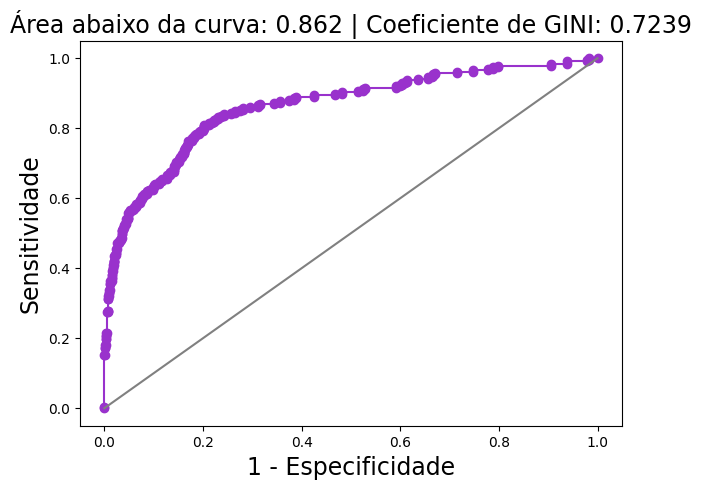

In [184]:
frb.curva_roc(observado=dados_rotatividade_ibm['attrition'], previsto=dados_rotatividade_ibm['phat'])

* A curva ROC plota a **Taxa de Verdadeiros Positivos (sensibilidade)** contra a **Taxa de Falsos Positivos (1 - especificidade)** para v√°rios valores de cutoff.
* A √°rea sob a curva (AUC) √© uma medida agregada da performance do modelo, variando de 0.5 (modelo aleat√≥rio) a 1 (modelo perfeito).

### Import√¢ncia dessas an√°lises

* A combina√ß√£o desses gr√°ficos permite escolher o melhor cutoff para o modelo, especialmente em cen√°rios de dados desbalanceados.
* A Curva ROC e o AUC fornecem uma avalia√ß√£o robusta e independente do cutoff escolhido.
* Essas ferramentas s√£o essenciais para garantir que o modelo tenha bom desempenho preditivo e seja confi√°vel para a tomada de decis√£o.

## 26. Balanceamento da Vari√°vel Alvo com SMOTE

Devido ao desbalanceamento significativo da vari√°vel alvo `attrition` (muito mais registros da classe 0 do que da classe 1), aplicamos a t√©cnica de **SMOTE (Synthetic Minority Over-sampling Technique)** para equilibrar as classes, gerando amostras sint√©ticas da classe minorit√°ria.

### 1. Remo√ß√£o tempor√°ria da coluna de probabilidades preditas

Para garantir que a nova an√°lise seja realizada em um dataset limpo, removemos a coluna `phat` gerada na etapa anterior:

In [185]:
dados_rotatividade_ibm.drop(columns='phat', inplace=True)

### 2. Prepara√ß√£o e Aplica√ß√£o dos dados com SMOTE

Separamos as vari√°veis independentes (`X`) da vari√°vel alvo (`y`) e logo em seguida criamos o objeto SMOTE e aplicamos o balanceamento:

In [186]:
from imblearn.over_sampling import SMOTE

X = dados_rotatividade_ibm.drop('attrition', axis=1)
y = dados_rotatividade_ibm['attrition']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


* O SMOTE sintetiza novas amostras da classe minorit√°ria (`attrition = 1`), equilibrando a quantidade de registros entre as classes.
* `random_state=42` garante reprodutibilidade do processo.

### 4. Reconstitui√ß√£o do DataFrame balanceado

Finalmente, juntamos as vari√°veis independentes e a vari√°vel alvo balanceada em um novo dataframe:

In [187]:
dados_rotatividade_ibm = pd.concat([X_res, y_res], axis=1)

In [188]:
dados_rotatividade_ibm.head()

age  distance_from_home  monthly_income  num_companies_worked  \
0   41                   1            5993                     8   
1   49                   8            5130                     1   
2   37                   2            2090                     6   
3   33                   3            2909                     1   
4   27                   2            3468                     2   

   percent_salary_hike  training_times_last_year  total_working_years  \
0                   11                         3                    8   
1                   23                         3                   10   
2                   15                         3                    7   
3                   11                         3                    8   
4                   12                         3                    6   

   years_at_company  years_in_current_role  years_since_last_promotion  \
0                 6                      4                           0   
1                10                      7                           1   
2                 0                      0                           0   
3                 8                      7                           3   
4                 2                      2                           2   

   years_with_curr_manager  business_travel_Travel_Frequently  \
0                        5                                  0   
1                        7                                  1   
2                        0                                  0   
3                        0                                  1   
4                        2                                  0   

   business_travel_Travel_Rarely  department_Research__Development  \
0                              1                                 0   
1                              0                                 1   
2                              1                                 1   
3                              0                                 1   
4                              1                                 1   

   department_Sales  education_Doctorate  education_Masters  \
0                 1                    0                  0   
1                 0                    0                  0   
2                 0                    0                  0   
3                 0                    0                  1   
4                 0                    0                  0   

   education_No_college  education_Some_college  \
0                     0                       1   
1                     1                       0   
2                     0                       1   
3                     0                       0   
4                     1                       0   

   education_field_Life_Sciences  education_field_Marketing  \
0                              1                          0   
1                              1                          0   
2                              0                          0   
3                              1                          0   
4                              0                          0   

   education_field_Medical  education_field_Other  \
0                        0                      0   
1                        0                      0   
2                        0                      1   
3                        0                      0   
4                        1                      0   

   education_field_Technical_Degree  environment_satisfaction_Low  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             0   
4                                 0                             1   

   environment_satisfaction_Medium  environment_satisfaction_Very_high  \
0                        

### Considera√ß√µes:

* O balanceamento com SMOTE √© fundamental para melhorar a capacidade do modelo em detectar corretamente os funcion√°rios que saem (classe minorit√°ria).
* Ap√≥s essa etapa, o dataset est√° pronto para uma nova rodada de modelagem, agora com classes equilibradas.

Aqui est√° o markdown explicativo para essa etapa de visualiza√ß√£o da nova distribui√ß√£o da vari√°vel alvo ap√≥s o balanceamento com SMOTE:

## 27. Visualiza√ß√£o da Nova Distribui√ß√£o da Vari√°vel Alvo Ap√≥s Balanceamento

Ap√≥s aplicar o SMOTE para balancear as classes da vari√°vel alvo `attrition`, verificamos a nova distribui√ß√£o para confirmar o sucesso do balanceamento.

### C√≥digo utilizado:

In [189]:
# Distribui√ß√£o da vari√°vel alvo
print(dados_rotatividade_ibm['attrition'].value_counts(normalize=True))
sns.countplot(x='attrition', data=dados_rotatividade_ibm)
plt.title("Distribui√ß√£o da vari√°vel alvo")
plt.show()

attrition
1    0.5
0    0.5
Name: proportion, dtype: float64


### Interpreta√ß√£o:

* O m√©todo `value_counts(normalize=True)` mostra a propor√ß√£o relativa das classes no dataset balanceado.
* O gr√°fico de barras (`countplot`) permite visualizar visualmente o equil√≠brio entre as classes `0` e `1`.

### Resultado esperado:

* As classes `0` (funcion√°rios que permaneceram) e `1` (funcion√°rios que sa√≠ram) apresentam agora **quantidades aproximadamente iguais**, indicando que o dataset est√° balanceado.
* Esse equil√≠brio √© fundamental para que modelos de classifica√ß√£o aprendam igualmente bem a distinguir ambas as classes.

> ‚úÖ Confirmar o balanceamento √© um passo importante antes de realizar uma nova rodada de treinamento e avalia√ß√£o do modelo.

Claro! Aqui est√° o markdown explicativo para essa nova rodada de modelagem ap√≥s o balanceamento dos dados:

## 28. Novo Ajuste do Modelo de Regress√£o Log√≠stica Ap√≥s Balanceamento com SMOTE

Com o dataset agora balanceado, realizamos uma nova modelagem de regress√£o log√≠stica para prever a vari√°vel alvo `attrition`.

### 1. Prepara√ß√£o da f√≥rmula do modelo

Geramos novamente a f√≥rmula que inclui todas as vari√°veis independentes codificadas:

In [190]:
lista_variaveis = list(dados_rotatividade_ibm.drop(columns='attrition').columns)
formula_dummies = '+'.join(lista_variaveis)
formula_dummies = 'attrition ~ ' + formula_dummies


### 2. Ajuste do modelo

Ajustamos o modelo de regress√£o log√≠stica utilizando a fun√ß√£o `glm` com fam√≠lia binomial:

In [191]:
modelo = smf.glm(formula=formula_dummies, data=dados_rotatividade_ibm, family=sm.families.Binomial()).fit()

In [192]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              attrition   No. Observations:                 2466
Model:                            GLM   Df Residuals:                     2413
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -575.02
Date:                Mon, 30 Jun 2025   Deviance:                       1150.0
Time:                        10:23:57   Pearson chi2:                 5.48e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6015
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              11.0267      1.003     10.999      0.000       9.062      12.992
age                                    -0.0227      0.011     -1.976      0.048      -0.045      -0.000
distance_from_home                      0.0325      0.010      3.364      0.001       0.014       0.051
monthly_income                      -9.674e-06   4.05e-05     -0.239      0.811   -8.91e-05    6.97e-05
num_companies_worked                    0.1125      0.039      2.870      0.004       0.036       0.189
percent_salary_hike                    -0.0367      0.032     -1.141      0.254      -0.100       0.026
training_times_last_year               -0.1214      0.110     -1.104      0.270      -0.337       0.094
total_working_years                    -0.0694      0.022     -3.224      0.001      -0.112      -0.027
years_at_company                       -0.0235      0.041     -0.570      0.569      -0.104       0.057
years_in_current_role                  -0.0654      0.047     -1.386      0.166      -0.158       0.027
years_since_last_promotion              0.1902      0.046      4.130      0.000       0.100       0.280
years_with_curr_manager                -0.0214      0.039     -0.548      0.584      -0.098       0.055
business_travel_Travel_Frequently       0.4961      0.270      1.836      0.066      -0.033       1.026
business_travel_Travel_Rarely          -0.1300      0.224     -0.580      0.562      -0.569       0.309
department_Research__Development       -3.0696      0.667     -4.604      0.000      -4.376      -1.763
department_Sales                       -0.1528      1.102     -0.139      0.890      -2.313       2.007
education_Doctorate                    -1.0860      0.563     -1.930      0.054      -2.189       0.017
education_Masters                      -0.6334      0.205     -3.096      0.002      -1.034      -0.232
education_No_college                   -0.6863      0.271     -2.536      0.011      -1.217      -0.156
education_Some_college                 -0.7133      0.231     -3.091      0.002      -1.166      -0.261
education_field_Life_Sciences          -4.2293      0.437     -9.672      0.000      -5.086      -3.372
education_field_Marketing              -3.6979      0.487     -7.595      0.000      -4.652      -2.744
education_field_Medical                -4.2602      0.445     -9.566      0.000      -5.133      -3.387
education_field_Other                  -4.1623      0.552     -7.546      0.000      -5.243      -3.081
education_field_Technical_Degree       -3.6067      0.489     -7.374      0.000      -4.565      -2.648
environment_satisfaction_Low            0.5095      0.215      2.372      0.018       0.089       0.930
environment_satisfaction_Medium        -0.4788      0.244     -1.96

### Considera√ß√µes:

* Com as classes balanceadas, o modelo tende a apresentar coeficientes mais est√°veis e significativos.
* A interpreta√ß√£o dos coeficientes passa a refletir melhor a influ√™ncia das vari√°veis na probabilidade de rotatividade.
* √â recomend√°vel avaliar as m√©tricas de performance deste novo modelo para validar melhorias em rela√ß√£o √† modelagem anterior.

> üß† Essa etapa representa a aplica√ß√£o pr√°tica da t√©cnica de balanceamento de classes para melhorar a capacidade preditiva do modelo em cen√°rios com dados desbalanceados.

## 29. Refinamento do Modelo com Sele√ß√£o Stepwise Ap√≥s Balanceamento

Ap√≥s ajustar o modelo de regress√£o log√≠stica com os dados balanceados, aplicamos o m√©todo **Stepwise** para realizar a sele√ß√£o autom√°tica das vari√°veis estatisticamente significantes.

### C√≥digo utilizado:

In [193]:
modelo = stepwise(modelo, 0.05)

Regression type: GLM 

Estimating model...: 
 attrition ~ Q('age') + Q('distance_from_home') + Q('monthly_income') + Q('num_companies_worked') + Q('percent_salary_hike') + Q('training_times_last_year') + Q('total_working_years') + Q('years_at_company') + Q('years_in_current_role') + Q('years_since_last_promotion') + Q('years_with_curr_manager') + Q('business_travel_Travel_Frequently') + Q('business_travel_Travel_Rarely') + Q('department_Research__Development') + Q('department_Sales') + Q('education_Doctorate') + Q('education_Masters') + Q('education_No_college') + Q('education_Some_college') + Q('education_field_Life_Sciences') + Q('education_field_Marketing') + Q('education_field_Medical') + Q('education_field_Other') + Q('education_field_Technical_Degree') + Q('environment_satisfaction_Low') + Q('environment_satisfaction_Medium') + Q('environment_satisfaction_Very_high') + Q('gender_Male') + Q('job_involvement_Low') + Q('job_involvement_Medium') + Q('job_involvement_Very_high') + Q('

In [194]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              attrition   No. Observations:                 2466
Model:                            GLM   Df Residuals:                     2426
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -578.11
Date:                Mon, 30 Jun 2025   Deviance:                       1156.2
Time:                        10:24:01   Pearson chi2:                 6.12e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6005
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   10.2014      0.845     12.078      0.000       8.546      11.857
Q('age')                                    -0.0238      0.011     -2.109      0.035      -0.046      -0.002
Q('distance_from_home')                      0.0321      0.010      3.358      0.001       0.013       0.051
Q('num_companies_worked')                    0.1210      0.038      3.159      0.002       0.046       0.196
Q('total_working_years')                    -0.0722      0.019     -3.753      0.000      -0.110      -0.034
Q('years_in_current_role')                  -0.0964      0.032     -3.033      0.002      -0.159      -0.034
Q('years_since_last_promotion')              0.1778      0.045      3.982      0.000       0.090       0.265
Q('business_travel_Travel_Frequently')       0.5956      0.194      3.069      0.002       0.215       0.976
Q('department_Research__Development')       -3.1911      0.645     -4.948      0.000      -4.455      -1.927
Q('education_Doctorate')                    -1.1529      0.561     -2.054      0.040      -2.253      -0.053
Q('education_Masters')                      -0.6470      0.202     -3.195      0.001      -1.044      -0.250
Q('education_No_college')                   -0.7032      0.268     -2.620      0.009      -1.229      -0.177
Q('education_Some_college')                 -0.7123      0.226     -3.153      0.002      -1.155      -0.270
Q('education_field_Life_Sciences')          -4.2945      0.416    -10.321      0.000      -5.110      -3.479
Q('education_field_Marketing')              -3.7469      0.461     -8.122      0.000      -4.651      -2.843
Q('education_field_Medical')                -4.3500      0.426    -10.223      0.000      -5.184      -3.516
Q('education_field_Other')                  -4.2647      0.531     -8.030      0.000      -5.306      -3.224
Q('education_field_Technical_Degree')       -3.6889      0.468     -7.878      0.000      -4.607      -2.771
Q('environment_satisfaction_Low')            0.4732      0.212      2.237      0.025       0.059       0.888
Q('environment_satisfaction_Medium')        -0.4823      0.241     -1.999      0.046      -0.955      -0.009
Q('environment_satisfaction_Very_high')     -0.7875      0.202     -3.899      0.000      -1.183      -0.392
Q('job_involvement_Low')                     0.9682      0.305      3.173      0.002       0.370       1.566
Q('job_involvement_Very_high')              -1.2730      0.343     -3.716      0.000      -1.945      -0.602
Q('job_role_Human_Resources')               -5.9167      0.844     -7.012      0.000      -7.571      -4.263
Q('job_role_Manager')                       -4.0918      0.813     -5.030      0.000      -5.686      -2.498
Q('job_role_Manufacturing_Direc

- O par√¢metro `0.05` define o n√≠vel de signific√¢ncia para manter vari√°veis no modelo.
- O Stepwise ajuda a eliminar vari√°veis n√£o significativas, simplificando o modelo e potencialmente melhorando sua performance e interpretabilidade.

## 30. Predi√ß√£o e Avalia√ß√£o do Modelo com Novo Cutoff Ap√≥s Balanceamento

Ap√≥s a sele√ß√£o final das vari√°veis com Stepwise, geramos as probabilidades preditas e avaliamos o desempenho do modelo com uma matriz de confus√£o, utilizando um novo cutoff ajustado.

### 1. Gera√ß√£o das probabilidades preditas (`phat`):

In [195]:
dados_rotatividade_ibm['phat'] = modelo.predict()

* Cada valor representa a probabilidade estimada de `attrition = 1` para cada funcion√°rio.

### 2. Avalia√ß√£o com matriz de confus√£o usando cutoff 0.38

In [196]:
frb.matriz_confusao(observado=dados_rotatividade_ibm['attrition'], predicts=dados_rotatividade_ibm['phat'], cutoff=0.38)

Sensitividade  Especificidade  Acur√°cia
0       0.905921        0.895377  0.900649

* O cutoff foi ajustado para **0.38** para otimizar a performance do modelo no dataset balanceado.
* Valores acima de 0.38 s√£o classificados como `1` (prev√™ sa√≠da), abaixo como `0`.

### 3. M√©tricas obtidas:

* **Sensitividade (Recall): 0.9059**
  O modelo identifica corretamente aproximadamente 90.6% dos funcion√°rios que sa√≠ram.

* **Especificidade: 0.8954**
  O modelo classifica corretamente aproximadamente 89.5% dos funcion√°rios que permaneceram.

* **Acur√°cia: 0.9006**
  O modelo acerta cerca de 90.1% das classifica√ß√µes totais.

### Insights:

* Houve uma melhora significativa nas m√©tricas de performance em rela√ß√£o √† modelagem anterior, gra√ßas ao balanceamento dos dados e √† sele√ß√£o de vari√°veis.
* O cutoff diferente reflete a nova distribui√ß√£o balanceada das classes e a necessidade de ajustar o limiar para maximizar o desempenho.
* Essas m√©tricas indicam que o modelo est√° eficaz tanto em identificar funcion√°rios que saem quanto os que permanecem.

## 31. Gr√°fico de Sensitividade e Especificidade para o Modelo Final

Para analisar o desempenho do modelo em diferentes valores de cutoff, geramos o gr√°fico que mostra a varia√ß√£o da Sensitividade (Recall) e Especificidade conforme o limiar de decis√£o.

### C√≥digo utilizado:

In [197]:
frb.grafico_sensitividade_especificidade(observado=dados_rotatividade_ibm['attrition'], predicts=dados_rotatividade_ibm['phat'])

### Objetivos do gr√°fico:

* Visualizar como as m√©tricas de Sensitividade e Especificidade se comportam em diferentes pontos de corte.
* Auxiliar na escolha do cutoff ideal para equilibrar a taxa de verdadeiros positivos e verdadeiros negativos.
* Garantir que o modelo esteja ajustado para atender aos objetivos do neg√≥cio, seja priorizando a detec√ß√£o de rotatividade ou minimizando falsos positivos.

> üìà Esse gr√°fico √© fundamental para entender o trade-off entre Sensitividade e Especificidade e definir o melhor limiar para classifica√ß√£o.

## 32. Avalia√ß√£o Final com Curva ROC (Receiver Operating Characteristic)

Para avaliar a **capacidade discriminativa** do modelo final, geramos a **Curva ROC**, que analisa o desempenho do classificador em todos os poss√≠veis valores de cutoff.

### C√≥digo utilizado:

In [198]:
frb.curva_roc(observado=dados_rotatividade_ibm['attrition'], previsto=dados_rotatividade_ibm['phat'])

### O que √© a Curva ROC?

* A ROC (Receiver Operating Characteristic) compara a **Taxa de Verdadeiros Positivos (Sensitividade)** com a **Taxa de Falsos Positivos (1 - Especificidade)** em diferentes limiares.
* A √°rea sob a curva (**AUC - Area Under the Curve**) √© um indicador do poder de separa√ß√£o do modelo:

  * AUC = 0.5 ‚Üí desempenho aleat√≥rio
  * AUC ‚â• 0.7 ‚Üí bom modelo
  * AUC ‚â• 0.9 ‚Üí excelente modelo

### Benef√≠cios:

* **Independente do cutoff**: avalia o modelo como um todo, sem depender de um ponto de corte espec√≠fico.
* Permite comparar modelos diferentes de forma justa e objetiva.
* Ajuda na sele√ß√£o de modelos mais robustos para aplica√ß√µes reais.

> ‚úÖ Uma **AUC elevada** indica que o modelo tem forte capacidade de distinguir entre funcion√°rios que v√£o sair e os que v√£o permanecer.

## 33. Encerramento e Exporta√ß√£o dos Dados Finais

Ap√≥s a conclus√£o da modelagem e da avalia√ß√£o do modelo, removemos a coluna de probabilidades (`phat`) gerada para an√°lise e exportamos o dataset final.

### 1. Remo√ß√£o da coluna `phat`:

In [199]:
dados_rotatividade_ibm.drop(columns='phat', inplace=True)

* Essa coluna foi √∫til para an√°lises e m√©tricas, mas n√£o √© necess√°ria no conjunto de dados final.

### 2. Exporta√ß√£o do dataset final:

In [200]:
dados_rotatividade_ibm.to_csv('dados_ibm_rotatividade.csv', index=False)

In [201]:
dados_rotatividade_ibm.head()

age  distance_from_home  monthly_income  num_companies_worked  \
0   41                   1            5993                     8   
1   49                   8            5130                     1   
2   37                   2            2090                     6   
3   33                   3            2909                     1   
4   27                   2            3468                     2   

   percent_salary_hike  training_times_last_year  total_working_years  \
0                   11                         3                    8   
1                   23                         3                   10   
2                   15                         3                    7   
3                   11                         3                    8   
4                   12                         3                    6   

   years_at_company  years_in_current_role  years_since_last_promotion  \
0                 6                      4                           0   
1                10                      7                           1   
2                 0                      0                           0   
3                 8                      7                           3   
4                 2                      2                           2   

   years_with_curr_manager  business_travel_Travel_Frequently  \
0                        5                                  0   
1                        7                                  1   
2                        0                                  0   
3                        0                                  1   
4                        2                                  0   

   business_travel_Travel_Rarely  department_Research__Development  \
0                              1                                 0   
1                              0                                 1   
2                              1                                 1   
3                              0                                 1   
4                              1                                 1   

   department_Sales  education_Doctorate  education_Masters  \
0                 1                    0                  0   
1                 0                    0                  0   
2                 0                    0                  0   
3                 0                    0                  1   
4                 0                    0                  0   

   education_No_college  education_Some_college  \
0                     0                       1   
1                     1                       0   
2                     0                       1   
3                     0                       0   
4                     1                       0   

   education_field_Life_Sciences  education_field_Marketing  \
0                              1                          0   
1                              1                          0   
2                              0                          0   
3                              1                          0   
4                              0                          0   

   education_field_Medical  education_field_Other  \
0                        0                      0   
1                        0                      0   
2                        0                      1   
3                        0                      0   
4                        1                      0   

   education_field_Technical_Degree  environment_satisfaction_Low  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             0   
4                                 0                             1   

   environment_satisfaction_Medium  environment_satisfaction_Very_high  \
0                        

* O arquivo `dados_ibm_rotatividade.csv` cont√©m o dataset balanceado e tratado, pronto para ser armazenado, compartilhado ou utilizado em outras aplica√ß√µes.

### ‚úÖ Conclus√£o

Com isso, finalizamos todas as etapas do projeto de an√°lise e modelagem da rotatividade de funcion√°rios da IBM:

* **Limpeza e tratamento dos dados**
* **Detec√ß√£o e substitui√ß√£o de outliers**
* **An√°lise explorat√≥ria (EDA)**
* **Codifica√ß√£o de vari√°veis categ√≥ricas**
* **Modelagem com Regress√£o Log√≠stica Bin√°ria**
* **Aplica√ß√£o de Stepwise para sele√ß√£o de vari√°veis**
* **Balanceamento com SMOTE**
* **Avalia√ß√£o completa com m√©tricas e gr√°ficos (Matriz de Confus√£o, Sensitividade/Especificidade, Curva ROC)**

Este notebook est√° agora bem documentado e estruturado, permitindo que os resultados sejam replicados, auditados e apresentados com clareza.

> üíæ O dataset final foi salvo para uso posterior ou integra√ß√£o com outras ferramentas.